# <font color ='black'>Analyzing soil carbon data from North Wyke platform</font>


<div>
<img src="nw.png" width="1200"/>
</div>

## Overview  

The North Wyke Farm Platform (NWFP) represents a large investment by BBSRC in the future, to not 
only study but also improve grassland livestock and arable systems in a national and global research 
asset linked to real-world farming. It is a world-class facility and a key member of the Global Farm 
Platform network http://www.globalfarmplatform.org/ which attracts researchers from different 
communities and disciplines seeking to develop sustainable ruminant production systems. The NWFP
provides access to a range of in situ state-of-the-art instrumentation in hydrologically isolated (sub-) 
catchments to better address key issues in sustainable agriculture related to:  

❖ A reduction in energy and greenhouse gas emissions for both environmental and economic
reasons.  
❖ Using plants to manage soils and hydrology.  
❖ Efficient nitrogen and phosphorus cycling in grassland and arable systems.  
❖ Resilience of soil biota and their functions in land-use change.  
❖ Impact of land management on carbon cycling and storage.  
❖ Water resource use efficiency.  
❖ Systems modelling to design optimal grassland and arable production systems.  

## Past, Current and Planned Treatments

The platform currently consists of 2 pasture-based livestock systems and 1 arable system, each of which consist of five component catchments over 21 ha. Catchments comprise single or multiple fields, that are heavily monitored to provide fine resolution data on all inputs, outputs and events. In addition, there is a housed system where cattle are reared indoors from weaning to slaughter.  

The timeline of each system’s treatment are as follows:  

- From April 2011 to March 2013, all three pasture-based livestock farming systems were as one (permanent pasture) with no separate treatments in operation. This is the baseline period.
- From April 2013 to September 2015, two of three systems gradually transitioned into the first post baseline phase, one re-sown with high sugar grasses (red system), the other re-sown with high sugar grass, white clover mix (blue system). The third continued as permanent pasture (green system) and will always do so, for long-term monitoring.
- From September 2015 to April 2019, the first post-baseline phase was in full operation across all three livestock farming systems and pasture treatments.
- From April 2019, the first post-baseline phase embarked on a transition to a second post-baseline phase, where the red system transitioned to an arable system growing human edible crops. Given the transition to arable cropping, cattle and sheep production are no longer associated with this system.  
- Instead, cattle previously linked to the system are permanently housed from weaning to slaughter. This represents a fourth (brown system) treatment for evaluation of more intensive finishing. Sheep production is only focussed on the green and blue systems.

The NWFP consists of three individual ‘farmlets’ each of which is approximately 21 ha and  has been designed to test the productivity and environmental sustainability of contrasting temperate grassland beef and sheep systems at appropriate farm and land management scales (Figure). The main farming systems or treatments on the platform are:
1. Permanent pasture: improvement through use of inorganic fertilisers (Green farmlet).
2. Increased use of legumes: replacing nitrogen fertilisers with biological fixation using sown legume and grass mixtures (Blue farmlet).
3. Planned reseeding: regular renewal, providing opportunities for introducing innovative varieties with desirable traits. Currently, high sugar and deep rooting grasses are studied (Red Farmlet).

<div>
<img src="nw_area.png" width="600"/>
</div>

## Analyzing soil carbon data from the North Wyke Platform

The objective of this project is to understand how has been the changes in soil carbon over the years in the North Wyke farm. In this first part, I loaded the datasets for each year and carried out some basic data cleaning and pre-processing, such as changing data types (from float to integer or from string to datetime), excluding columns, changing column names among others. 

### Part 1: Data cleaning 

In [69]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gp
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 700)

### Year 2012

In [70]:
## Load data
field_2012 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2012-01-01_2012-12-31.csv')

In [71]:
# Check columns
field_2012['Field'].unique()

array(['Pecketsford', 'Little Pecketsford', 'Great Field', 'Poor Field',
       'Ware Park', 'Bottom Burrows, Bottom Burrows', 'Burrows, Burrows',
       'Top Burrows', 'Orchard Dean, Orchard Dean North',
       'Orchard Dean, Orchard Dean South', 'Golden Rove',
       'Higher Wyke Moor', 'Middle Wyke Moor', 'Lower Wyke Moor',
       'Dairy South', 'Dairy Corner', 'Dairy East', 'Lower Wheaty',
       'Dairy North', 'Longlands South', 'Longlands North',
       'Longlands East'], dtype=object)

In [72]:
# Columns to drop
drop_columns_2012 = ['pH Quality Last Modified', 'Bulk density Quality', 'Bulk density Quality Last Modified',
               'pH Quality', 'Total-N Quality', 'Total-N Quality Last Modified', 'Total-C Quality', 
                'Total-C Quality Last Modified', 'delta vs air - 15N', 'delta vs air - 15N Quality',
                'delta vs air - 15N Quality Last Modified', 'delta vs PDB - 13C', 'SOM Quality Last Modified',
                'delta vs PDB - 13C Quality', 'delta vs PDB - 13C Quality Last Modified', 'comments', 'SOM Quality',
                'Start_Sample_Date', 'GPS_Sample_Nr', 'Flume']

In [73]:
# Dictionary with names
dict_names_2012 = {'Bulk density (g/cm3)': 'BD_gcm3', 'SOM (% of DM)': 'OM_%w/w', 
              'Total-N (% of DM)': 'N_total_%w/w', 'Total-C (% of DM)': 'C_total_%w/w'}

In [74]:
# Drop columns
field_2012.drop(drop_columns_2012, axis = 1 , inplace = True)

In [75]:
# Rename columns
field_2012.rename(columns = dict_names_2012, inplace = True)

In [76]:
# Aglimpse on the data
field_2012.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w
0,FP003,1,50,Pecketsford,06/06/2012,12:00:00,265632,99300,5.18,0.916,10.1,0.51,4.742
1,FP003,2,50,Pecketsford,06/06/2012,12:00:00,265625,99275,5.23,0.943,10.4,0.55,4.980
2,FP003,7,50,Pecketsford,06/06/2012,12:00:00,265575,99225,5.54,0.948,11.8,0.64,5.610
3,FP003,9,50,Pecketsford,06/06/2012,12:00:00,265625,99225,5.12,0.857,10.9,0.54,4.510
4,FP003,17,50,Pecketsford,06/06/2012,12:00:00,265575,99175,5.68,0.946,11.5,0.59,5.340


In [77]:
# Info
field_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        264 non-null    object 
 1   SP_ID                264 non-null    int64  
 2   sample_distance (m)  264 non-null    int64  
 3   Field                264 non-null    object 
 4   Sample_date          264 non-null    object 
 5   Sample_time          264 non-null    object 
 6   Easting              264 non-null    int64  
 7   Northing             264 non-null    int64  
 8   pH                   264 non-null    float64
 9   BD_gcm3              264 non-null    float64
 10  OM_%w/w              264 non-null    float64
 11  N_total_%w/w         263 non-null    float64
 12  C_total_%w/w         263 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 26.9+ KB


In [78]:
# Check duplicates using the XY coordinates (Easting-Northing)
bool_series = field_2012[['Sample_date', 'Easting', 'Northing']].duplicated()
print(bool_series.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [79]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2012['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2012['C_total_%w/w'].isna().sum()))

There are 0 null values in the OM% column
There are 1 null values in the C% column


In [80]:
# Drop NA from C% column
field_2012.dropna(subset = 'C_total_%w/w', inplace = True)

In [81]:
# Check dataset again
field_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 263
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        263 non-null    object 
 1   SP_ID                263 non-null    int64  
 2   sample_distance (m)  263 non-null    int64  
 3   Field                263 non-null    object 
 4   Sample_date          263 non-null    object 
 5   Sample_time          263 non-null    object 
 6   Easting              263 non-null    int64  
 7   Northing             263 non-null    int64  
 8   pH                   263 non-null    float64
 9   BD_gcm3              263 non-null    float64
 10  OM_%w/w              263 non-null    float64
 11  N_total_%w/w         263 non-null    float64
 12  C_total_%w/w         263 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 28.8+ KB


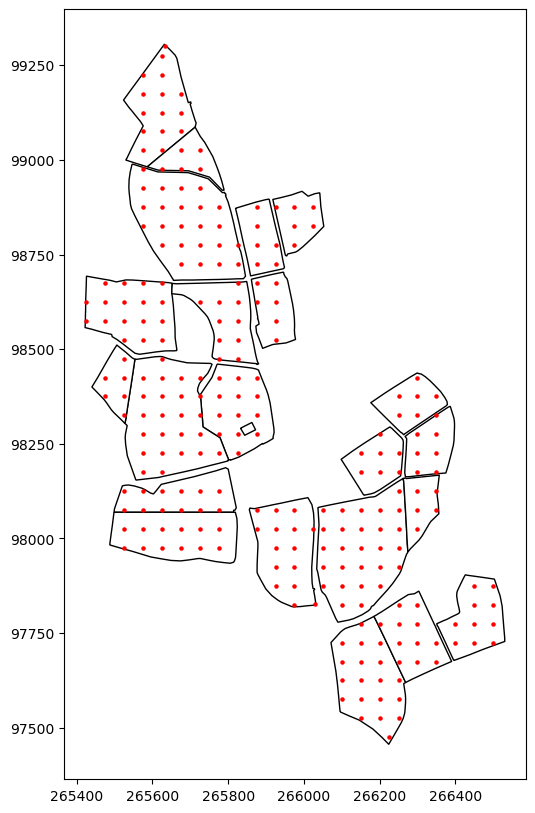

In [82]:
# Plot points
field_2012_gp = gp.GeoDataFrame(field_2012, geometry = gp.points_from_xy(field_2012.Easting, field_2012.Northing))
area = gp.read_file('C:/Users/neliq/Documents/NIF/Rothamsted/2.shapefiles/area_field.shp')
area_plot = area.plot(color = 'white', ec = 'black', figsize = (8,10))
field_2012_gp.plot(ax = area_plot, markersize=5, color = 'red')
plt.show()

In [83]:
# Convert object to datetime
field_2012['Sample_date'] = pd.to_datetime(field_2012['Sample_date'])

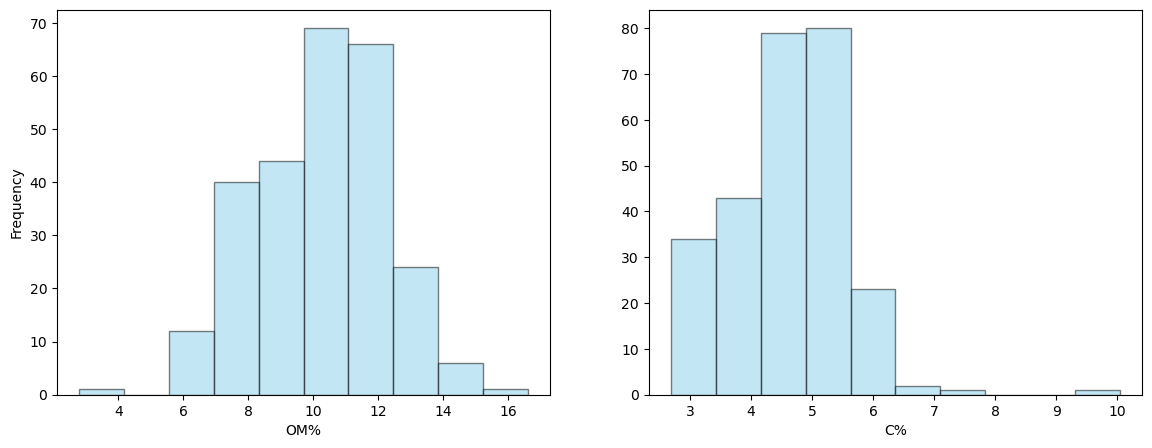

In [84]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2012['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue', alpha = 0.5)
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2012['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue', alpha = 0.5)
plt.xlabel('C%')
plt.ylabel('')
plt.show()

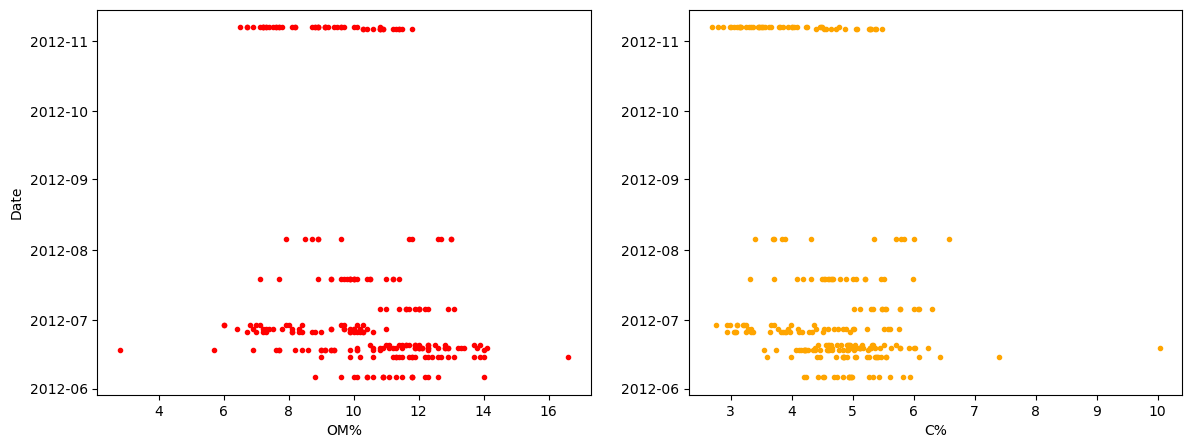

In [85]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2012['OM_%w/w'], field_2012['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2012['C_total_%w/w'], field_2012['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [86]:
# Get Field names
field_2012['Field'].unique()

array(['Pecketsford', 'Little Pecketsford', 'Great Field', 'Poor Field',
       'Ware Park', 'Bottom Burrows, Bottom Burrows', 'Burrows, Burrows',
       'Top Burrows', 'Orchard Dean, Orchard Dean North',
       'Orchard Dean, Orchard Dean South', 'Golden Rove',
       'Higher Wyke Moor', 'Middle Wyke Moor', 'Lower Wyke Moor',
       'Dairy South', 'Dairy Corner', 'Dairy East', 'Lower Wheaty',
       'Dairy North', 'Longlands South', 'Longlands North',
       'Longlands East'], dtype=object)

In [87]:
# Replace Field names
field_2012['Field'].replace(['Bottom Burrows, Bottom Burrows', 'Burrows, Burrows', 'Orchard Dean, Orchard Dean North', 
                             'Orchard Dean, Orchard Dean South'],
                            ['Bottom Burrows', 'Burrows', 'Orchard Dean North', 'Orchard Dean South'], inplace = True)

In [88]:
# Create a new column with the year
field_2012.insert(3, 'Year', '2012')
field_2012.head()

,Experiment_Id,SP_ID,sample_distance (m),Year,Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,geometry
0,FP003,1,50,2012,Pecketsford,2012-06-06,12:00:00,265632,99300,5.18,0.916,10.1,0.51,4.742,POINT (265632.000 99300.000)
1,FP003,2,50,2012,Pecketsford,2012-06-06,12:00:00,265625,99275,5.23,0.943,10.4,0.55,4.980,POINT (265625.000 99275.000)
2,FP003,7,50,2012,Pecketsford,2012-06-06,12:00:00,265575,99225,5.54,0.948,11.8,0.64,5.610,POINT (265575.000 99225.000)
3,FP003,9,50,2012,Pecketsford,2012-06-06,12:00:00,265625,99225,5.12,0.857,10.9,0.54,4.510,POINT (265625.000 99225.000)
4,FP003,17,50,2012,Pecketsford,2012-06-06,12:00:00,265575,99175,5.68,0.946,11.5,0.59,5.340,POINT (265575.000 99175.000)


In [55]:
# Export csv
field_2012.to_csv("C:/Users/neliq/Documents/NIF/Rothamsted/3.clean_data/field2012_clean.csv")

In [226]:
# Average by field
field_2012_by_field = field_2012.groupby(['Field']).mean().reset_index()
field_2012_by_field

,Field,SP_ID,sample_distance (m),Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w
0,Bottom Burrows,312.666667,50.0,265508.333333,98400.000000,5.616667,0.885833,8.616667,0.488500,4.200167
1,Burrows,373.666667,50.0,265650.000000,98314.583333,5.664167,0.906917,8.958333,0.540917,4.433000
2,Dairy Corner,845.600000,50.0,266320.000000,98085.000000,5.576000,0.857200,9.560000,0.537200,4.290400
3,Dairy East,962.714286,50.0,266328.571429,98239.285714,5.404286,0.906857,11.971429,0.624286,5.511429
4,Dairy North,1024.333333,50.0,266291.666667,98366.666667,5.785000,0.920000,12.466667,0.655333,5.880333
5,Dairy South,887.259259,50.0,266148.148148,97973.148148,5.555185,0.890815,12.144444,0.610000,5.433333
6,Golden Rove,620.866667,50.0,265951.933333,97968.466667,5.593333,0.941400,10.960000,0.583333,5.015333
7,Great Field,132.416667,50.0,265689.583333,98831.250000,5.878750,0.965417,7.729167,0.428750,3.431667
8,Higher Wyke Moor,690.315789,50.0,266172.368421,97622.368421,5.267368,0.827211,8.889474,0.420684,3.770895
9,Little Pecketsford,67.800000,50.0,265685.000000,98995.000000,5.388000,0.922800,11.660000,0.626000,5.014000


In [227]:
# Export csv
field_2012_by_field.to_csv("C:/Users/neliq/Documents/NIF/Rothamsted/3.clean_data/field2012_clean_by_field.csv")

### Year 2013

In [89]:
## Load data
field_2013 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2013-01-01_2013-12-31.csv')

In [90]:
# Check columns
field_2013.columns.tolist()

['Experiment_Id',
 'SP_ID',
 'sample_distance (m)',
 'Field',
 'Flume',
 'Sample_date',
 'Sample_time',
 'comments',
 'Start_Sample_Date',
 'GPS_Sample_Nr',
 'Easting',
 'Northing',
 'pH',
 'pH Quality',
 'pH Quality Last Modified',
 'SOM (% of DM)',
 'SOM Quality',
 'SOM Quality Last Modified',
 'Total-N (% of DM)',
 'Total-N Quality',
 'Total-N Quality Last Modified',
 'Total-C (% of DM)',
 'Total-C Quality',
 'Total-C Quality Last Modified']

In [91]:
# Columns to drop
drop_columns_2013 = ['comments','pH Quality', 'pH Quality Last Modified', 'SOM Quality', 'SOM Quality Last Modified', 
                     'Total-N Quality', 'Total-N Quality Last Modified', 'Total-C Quality', 'Total-C Quality Last Modified',
                    'Flume', 'GPS_Sample_Nr', 'Start_Sample_Date']

In [92]:
# Dictionary with names
dict_names_2013 = {'SOM (% of DM)': 'OM_%w/w', 
                   'Total-N (% of DM)': 'N_total_%w/w', 'Total-C (% of DM)': 'C_total_%w/w'}

In [93]:
# Drop columns
field_2013.drop(drop_columns_2013, axis = 1 , inplace = True)

In [94]:
# Rename columns
field_2013.rename(columns = dict_names_2013, inplace = True)

In [95]:
# Aglimpse on the data
field_2013.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,OM_%w/w,N_total_%w/w,C_total_%w/w
0,FP008,1041,25,Longlands South,01/06/2013,12:00:00,265943,98700,5.57,11.9869,0.421,3.891
1,FP008,1042,25,Longlands South,01/06/2013,12:00:00,265863,98683,5.59,15.0689,0.521,4.966
2,FP008,1043,25,Longlands South,01/06/2013,12:00:00,265875,98675,5.57,13.1185,0.459,4.035
3,FP008,1044,25,Longlands South,01/06/2013,12:00:00,265900,98675,5.68,11.8098,0.425,3.705
4,FP008,1045,25,Longlands South,01/06/2013,12:00:00,265925,98675,5.53,12.8909,0.460,4.301


In [96]:
field_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        423 non-null    object 
 1   SP_ID                423 non-null    int64  
 2   sample_distance (m)  423 non-null    int64  
 3   Field                423 non-null    object 
 4   Sample_date          423 non-null    object 
 5   Sample_time          423 non-null    object 
 6   Easting              423 non-null    int64  
 7   Northing             423 non-null    int64  
 8   pH                   423 non-null    float64
 9   OM_%w/w              89 non-null     float64
 10  N_total_%w/w         89 non-null     float64
 11  C_total_%w/w         89 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 39.8+ KB


In [97]:
# Check duplicates
bool_series_13 = field_2013[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_13.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [98]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2013['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2013['C_total_%w/w'].isna().sum()))

There are 334 null values in the OM% column
There are 334 null values in the C% column


In [99]:
field_2013.dropna(subset = 'OM_%w/w', inplace = True)
field_2013.dropna(subset = 'C_total_%w/w', inplace = True)

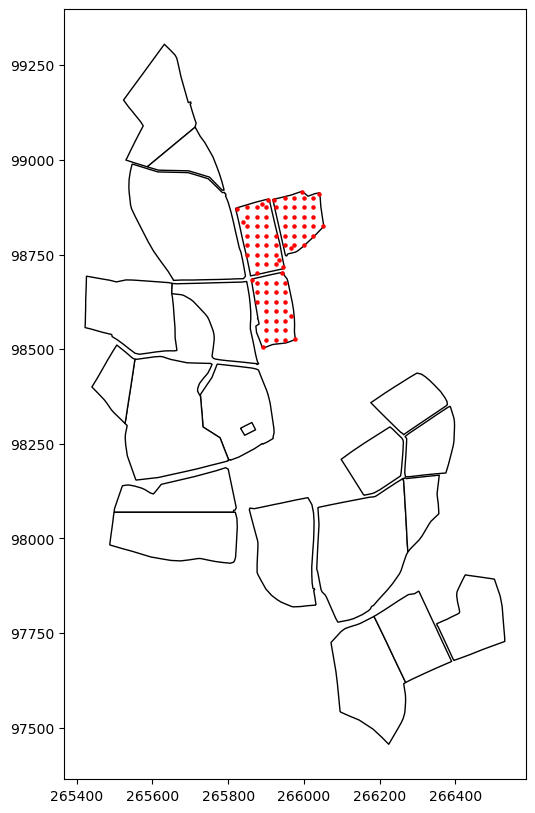

In [101]:
# Plot points
field_2013_gp = gp.GeoDataFrame(field_2013, geometry = gp.points_from_xy(field_2013.Easting, field_2013.Northing))
area = gp.read_file('C:/Users/neliq/Documents/NIF/Rothamsted/2.shapefiles/area_field.shp')
area_plot = area.plot(color = 'white', ec = 'black', figsize = (8,10))
field_2013_gp.plot(ax = area_plot, markersize=5, color = 'red')
plt.show()

In [34]:
# Convert object to datetime
#field_2013['Sample_date'] = pd.to_datetime(field_2013['Sample_date'])

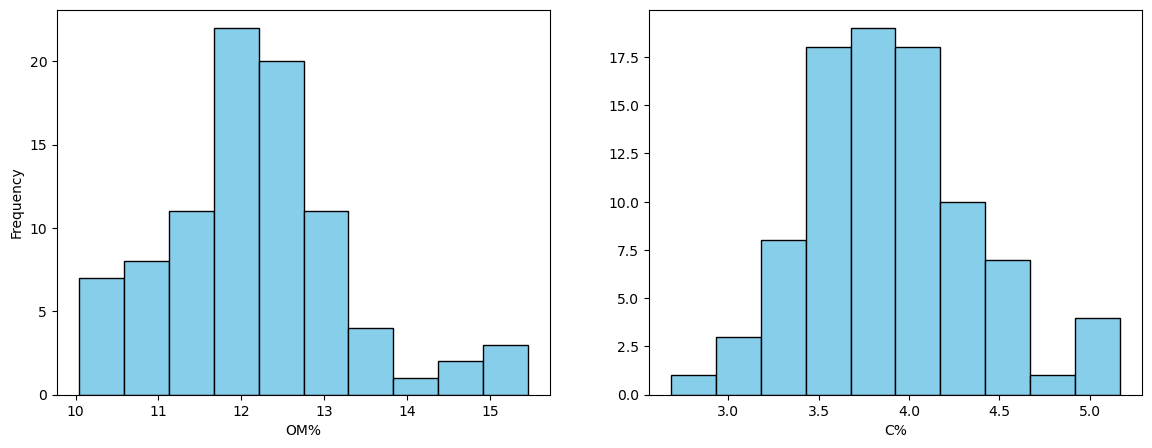

In [102]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2013['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue')
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2013['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue')
plt.xlabel('C%')
plt.ylabel('')
plt.show()

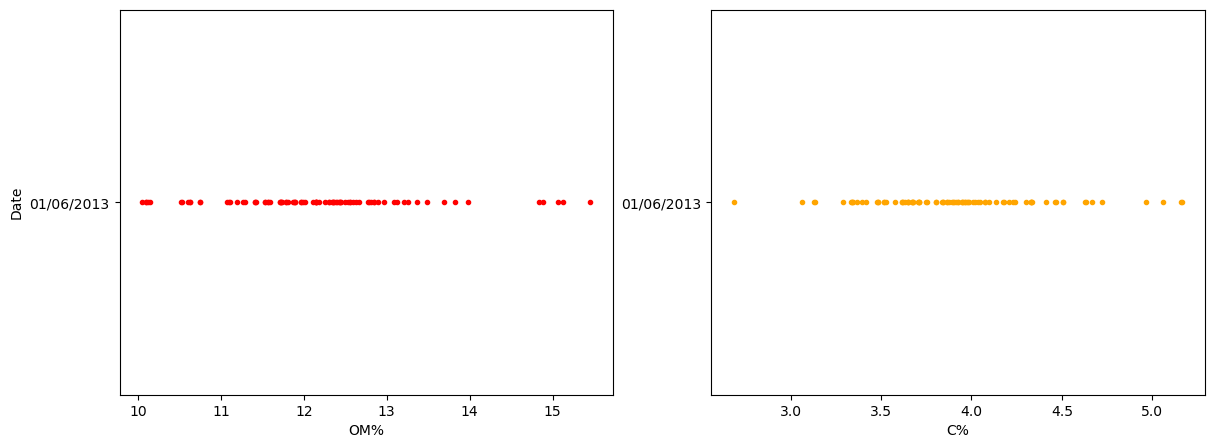

In [103]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2013['OM_%w/w'], field_2013['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2013['C_total_%w/w'], field_2013['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [104]:
# Get Field names
field_2013['Field'].unique()

array(['Longlands South', 'Longlands North', 'Longlands East'],
      dtype=object)

In [105]:
# Create a new column with the year
field_2013.insert(3, 'Year', '2013')
field_2013.head()

,Experiment_Id,SP_ID,sample_distance (m),Year,Field,Sample_date,Sample_time,Easting,Northing,pH,OM_%w/w,N_total_%w/w,C_total_%w/w,geometry
0,FP008,1041,25,2013,Longlands South,01/06/2013,12:00:00,265943,98700,5.57,11.9869,0.421,3.891,POINT (265943.000 98700.000)
1,FP008,1042,25,2013,Longlands South,01/06/2013,12:00:00,265863,98683,5.59,15.0689,0.521,4.966,POINT (265863.000 98683.000)
2,FP008,1043,25,2013,Longlands South,01/06/2013,12:00:00,265875,98675,5.57,13.1185,0.459,4.035,POINT (265875.000 98675.000)
3,FP008,1044,25,2013,Longlands South,01/06/2013,12:00:00,265900,98675,5.68,11.8098,0.425,3.705,POINT (265900.000 98675.000)
4,FP008,1045,25,2013,Longlands South,01/06/2013,12:00:00,265925,98675,5.53,12.8909,0.460,4.301,POINT (265925.000 98675.000)


In [106]:
# Export csv
field_2013.to_csv("C:/Users/neliq/Documents/NIF/Rothamsted/3.clean_data/field2013_clean.csv")

### Year 2016

In [107]:
## Load data
field_2016 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2016-01-01_2016-12-31.csv')

In [ ]:
# Check columns
field_2016.columns.tolist()

In [109]:
# Columns to keep
columns_to_keep = ['Experiment_Id','SP_ID','sample_distance (m)','Field','Sample_date','Sample_time', 
                   'Easting','Northing','pH','Bulk density (g/cm3)',
                   'SOM (% of DM)', 'Total-N (% of DM)', 'Total-C (% of DM)']

In [110]:
# Drop other columns
field_2016 = field_2016[columns_to_keep]

In [111]:
# Dictionary with names
dict_names_2016 = {'Bulk density (g/cm3)':'BD_gcm3', 'SOM (% of DM)': 'OM_%w/w', 
                   'Total-N (% of DM)': 'N_total_%w/w', 'Total-C (% of DM)': 'C_total_%w/w'}

In [112]:
# Rename columns
field_2016.rename(columns = dict_names_2016, inplace = True)

In [113]:
# A glimpse on the data
field_2016.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w
0,FP059,1,50,Pecketsford,14/07/2016,16:24:00,265631.6521,99300.30838,5.60,0.56,12.9,0.525,5.390
1,FP059,2,50,Pecketsford,14/07/2016,16:20:00,265625.0000,99275.00000,5.41,0.70,10.6,0.446,4.280
2,FP059,7,50,Pecketsford,14/07/2016,16:09:00,265575.0000,99225.00000,5.49,1.06,9.7,0.404,3.667
3,FP059,9,50,Pecketsford,14/07/2016,16:15:00,265625.0000,99225.00000,5.28,1.05,10.2,0.424,4.100
4,FP059,17,50,Pecketsford,14/07/2016,16:04:00,265575.0000,99175.00000,5.51,1.05,10.0,0.403,3.885


In [114]:
# Info
field_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        396 non-null    object 
 1   SP_ID                396 non-null    int64  
 2   sample_distance (m)  396 non-null    int64  
 3   Field                396 non-null    object 
 4   Sample_date          396 non-null    object 
 5   Sample_time          396 non-null    object 
 6   Easting              396 non-null    float64
 7   Northing             396 non-null    float64
 8   pH                   347 non-null    float64
 9   BD_gcm3              392 non-null    float64
 10  OM_%w/w              348 non-null    float64
 11  N_total_%w/w         348 non-null    float64
 12  C_total_%w/w         348 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 40.3+ KB


In [115]:
# Check duplicates
bool_series_16 = field_2016[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_16.tolist())

[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,

In [116]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2016['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2016['C_total_%w/w'].isna().sum()))

There are 48 null values in the OM% column
There are 48 null values in the C% column


In [117]:
# Drop NAs
field_2016.dropna(subset = 'OM_%w/w', inplace = True)
field_2016.dropna(subset = 'C_total_%w/w', inplace = True)

In [118]:
# Check dataset again
field_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 395
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        348 non-null    object 
 1   SP_ID                348 non-null    int64  
 2   sample_distance (m)  348 non-null    int64  
 3   Field                348 non-null    object 
 4   Sample_date          348 non-null    object 
 5   Sample_time          348 non-null    object 
 6   Easting              348 non-null    float64
 7   Northing             348 non-null    float64
 8   pH                   347 non-null    float64
 9   BD_gcm3              344 non-null    float64
 10  OM_%w/w              348 non-null    float64
 11  N_total_%w/w         348 non-null    float64
 12  C_total_%w/w         348 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 38.1+ KB


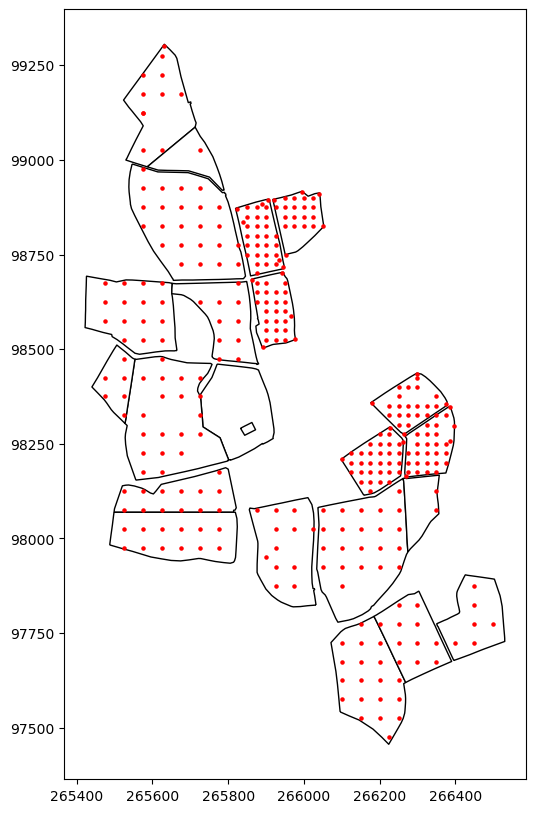

In [119]:
# Plot points
field_2016_gp = gp.GeoDataFrame(field_2016, geometry = gp.points_from_xy(field_2016.Easting, field_2016.Northing))
area = gp.read_file('C:/Users/neliq/Documents/NIF/Rothamsted/2.shapefiles/area_field.shp')
area_plot = area.plot(color = 'white', ec = 'black', figsize = (8,10))
field_2016_gp.plot(ax = area_plot, markersize=5, color = 'red')
plt.show()

In [29]:
# Convert object to datetime
#field_2016['Sample_date'] = pd.to_datetime(field_2016['Sample_date'])

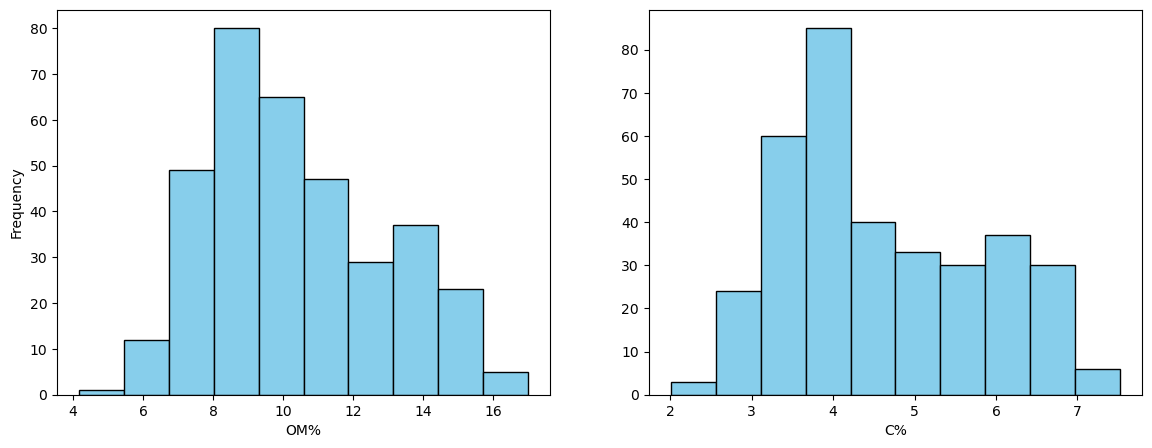

In [120]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2016['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue')
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2016['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue')
plt.xlabel('C%')
plt.ylabel('')
plt.show()

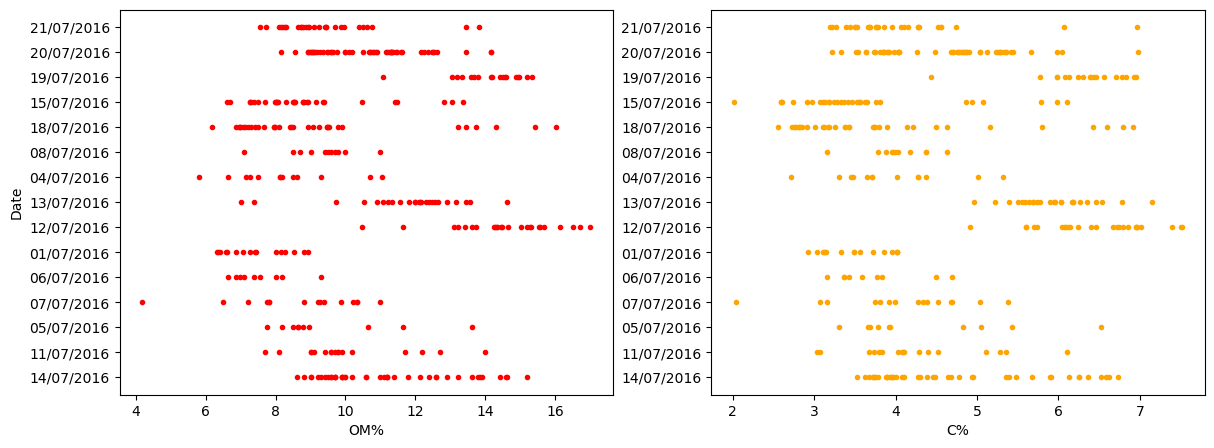

In [121]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2016['OM_%w/w'], field_2016['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2016['C_total_%w/w'], field_2016['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [122]:
# Get Field names
field_2016['Field'].unique()

array(['Pecketsford', 'Little Pecketsford', 'Great Field', 'Poor Field',
       'Ware Park', 'Bottom Burrows, Bottom Burrows', 'Burrows, Burrows',
       'Orchard Dean, Orchard Dean North',
       'Orchard Dean, Orchard Dean South', 'Golden Rove',
       'Higher Wyke Moor', 'Middle Wyke Moor', 'Lower Wyke Moor',
       'Dairy South', 'Dairy Corner', 'Dairy East', 'Lower Wheaty',
       'Dairy North', 'Longlands South', 'Longlands North',
       'Longlands East'], dtype=object)

In [123]:
# Replace Field names
field_2016['Field'].replace(['Bottom Burrows, Bottom Burrows', 'Burrows, Burrows', 'Orchard Dean, Orchard Dean North', 
                             'Orchard Dean, Orchard Dean South'],
                            ['Bottom Burrows', 'Burrows', 'Orchard Dean North', 'Orchard Dean South'], inplace = True)

In [124]:
# Create a new column with the year
field_2016.insert(3, 'Year', '2016')
field_2016.head()

,Experiment_Id,SP_ID,sample_distance (m),Year,Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,geometry
0,FP059,1,50,2016,Pecketsford,14/07/2016,16:24:00,265631.6521,99300.30838,5.60,0.56,12.9,0.525,5.390,POINT (265631.652 99300.308)
1,FP059,2,50,2016,Pecketsford,14/07/2016,16:20:00,265625.0000,99275.00000,5.41,0.70,10.6,0.446,4.280,POINT (265625.000 99275.000)
2,FP059,7,50,2016,Pecketsford,14/07/2016,16:09:00,265575.0000,99225.00000,5.49,1.06,9.7,0.404,3.667,POINT (265575.000 99225.000)
3,FP059,9,50,2016,Pecketsford,14/07/2016,16:15:00,265625.0000,99225.00000,5.28,1.05,10.2,0.424,4.100,POINT (265625.000 99225.000)
4,FP059,17,50,2016,Pecketsford,14/07/2016,16:04:00,265575.0000,99175.00000,5.51,1.05,10.0,0.403,3.885,POINT (265575.000 99175.000)


In [125]:
# Export csv
field_2016.to_csv("C:/Users/neliq/Documents/NIF/Rothamsted/3.clean_data/field2016_clean.csv")

In [164]:
# Average by field
field_2016_by_field = field_2016.groupby(['Field']).mean().reset_index()
field_2016_by_field

,Field,SP_ID,sample_distance (m),Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w
0,Bottom Burrows,312.666667,50.000000,265508.333333,98400.000000,5.803333,0.970000,12.803333,0.558833,5.668167
1,Burrows,371.842105,50.000000,265643.421053,98319.736842,5.815789,0.912632,15.107368,0.648895,6.695105
2,Dairy Corner,839.500000,50.000000,266350.000000,98100.000000,5.585000,1.125000,8.700000,0.388500,3.548000
3,Dairy East,962.862069,25.000000,266333.175348,98240.232009,5.805517,1.076552,8.320345,0.388793,3.470034
4,Dairy North,1027.391304,25.000000,266281.261500,98353.257216,5.675217,0.920435,14.163043,0.670261,6.271913
5,Dairy South,877.227273,50.000000,266152.272727,98000.000000,5.679091,0.981364,9.886364,0.471955,4.242636
6,Golden Rove,617.416667,47.916667,265943.750000,97985.416667,5.551667,0.842727,13.693333,0.641000,6.202167
7,Great Field,132.416667,50.000000,265689.583333,98831.250000,5.723333,0.952609,10.158333,0.432458,4.188542
8,Higher Wyke Moor,690.315789,50.000000,266172.368421,97622.368421,5.466316,0.981579,8.176368,0.398737,3.865421
9,Little Pecketsford,61.000000,50.000000,265725.000000,99025.000000,5.980000,0.910000,8.500000,0.393000,3.665000


In [165]:
# Export csv
field_2016_by_field.to_csv("C:/Users/neliq/Documents/NIF/Rothamsted/3.clean_data/field2016_clean_by_field.csv")

### Year 2018

In [145]:
## Load data
field_2018 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2018-01-01_2018-12-31.csv')

In [ ]:
# Check columns
field_2018.columns

In [146]:
# Columns to keep
columns_to_keep2018 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [147]:
# Keep the columns
field_2018 = field_2018[columns_to_keep2018]

In [148]:
# Dictionary with column names
dict_names_2018 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [149]:
# Rename columns
field_2018.rename(columns = dict_names_2018 , inplace = True)

In [150]:
# A glimpse on the data
field_2018.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,NW686-SP,19,NaN,Pecketsford,16/04/2018,12:01:00,265675.48,99082.77,NaN,NaN,NaN,NaN,NaN
1,NW686-SP,19,NaN,Pecketsford,16/04/2018,12:02:00,265592.76,99019.42,NaN,NaN,NaN,NaN,NaN
2,NW686-SP,19,NaN,Pecketsford,16/04/2018,12:03:00,265616.49,99071.76,NaN,NaN,NaN,NaN,NaN
3,NW686-SP,19,NaN,Pecketsford,16/04/2018,12:04:00,265677.84,99122.84,NaN,NaN,NaN,NaN,NaN
4,NW686-SP,19,NaN,Pecketsford,16/04/2018,12:05:00,265638.23,99138.69,NaN,NaN,NaN,NaN,NaN


In [151]:
# Info
field_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        294 non-null    object 
 1   SP_ID                294 non-null    int64  
 2   sample_distance (m)  0 non-null      float64
 3   Field                294 non-null    object 
 4   Sample_date          294 non-null    object 
 5   Sample_time          294 non-null    object 
 6   Easting              294 non-null    float64
 7   Northing             294 non-null    float64
 8   pH                   84 non-null     float64
 9   conductivity_uScm    80 non-null     float64
 10  OM_%w/w              84 non-null     float64
 11  N_total_%w/w         84 non-null     float64
 12  C_total_%w/w         84 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 30.0+ KB


In [152]:
# Check duplicates
bool_series_18 = field_2018[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_18.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [153]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2018['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2018['C_total_%w/w'].isna().sum()))

There are 210 null values in the OM% column
There are 210 null values in the C% column


In [154]:
# Drop NAs
field_2018.dropna(subset = 'OM_%w/w', inplace = True)
field_2018.dropna(subset = 'C_total_%w/w', inplace = True)

In [155]:
# Check dataset again
field_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 210 to 293
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        84 non-null     object 
 1   SP_ID                84 non-null     int64  
 2   sample_distance (m)  0 non-null      float64
 3   Field                84 non-null     object 
 4   Sample_date          84 non-null     object 
 5   Sample_time          84 non-null     object 
 6   Easting              84 non-null     float64
 7   Northing             84 non-null     float64
 8   pH                   84 non-null     float64
 9   conductivity_uScm    80 non-null     float64
 10  OM_%w/w              84 non-null     float64
 11  N_total_%w/w         84 non-null     float64
 12  C_total_%w/w         84 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 9.2+ KB


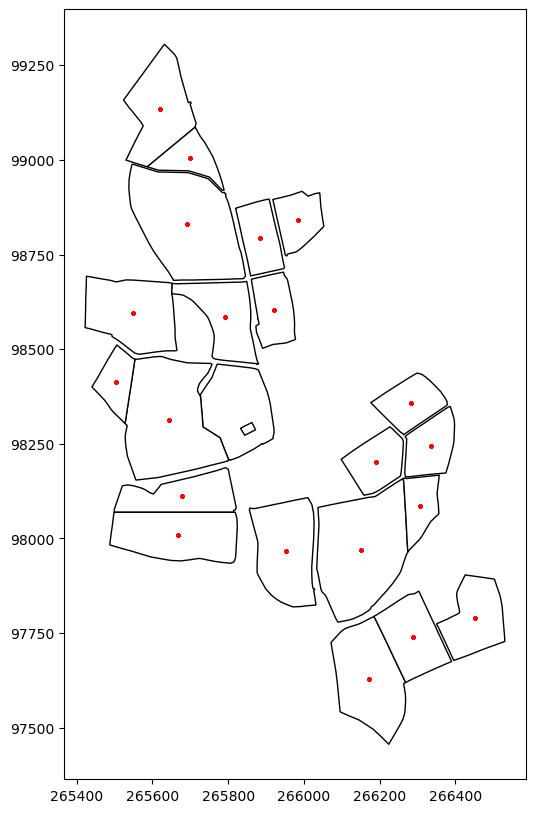

In [156]:
# Plot points
field_2018_gp = gp.GeoDataFrame(field_2018, geometry = gp.points_from_xy(field_2018.Easting, field_2018.Northing))
area = gp.read_file('C:/Users/neliq/Documents/NIF/Rothamsted/2.shapefiles/area_field.shp')
area_plot = area.plot(color = 'white', ec = 'black', figsize = (8,10))
field_2018_gp.plot(ax = area_plot, markersize=5, color = 'red')
plt.show()

In [140]:
# Convert object to datetime
field_2018['Sample_date'] = pd.to_datetime(field_2018['Sample_date'])

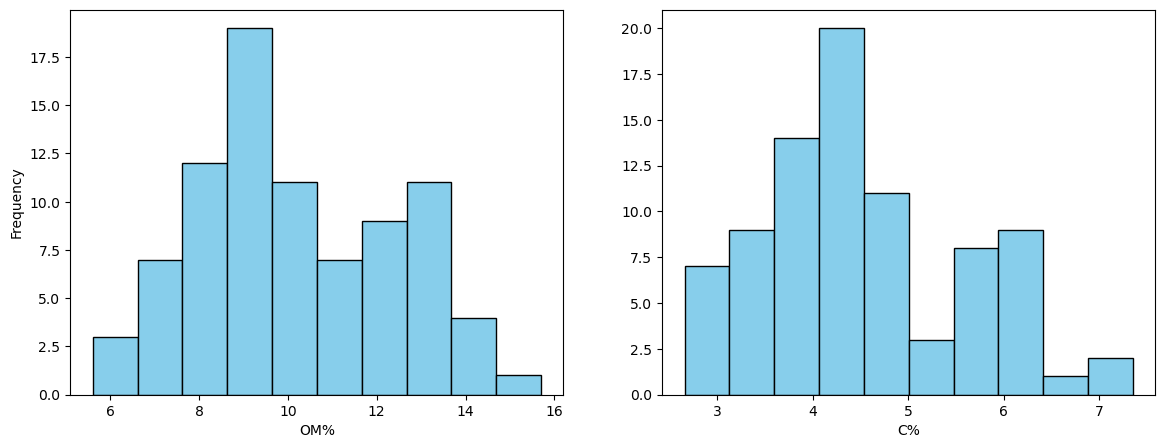

In [157]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2018['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue')
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2018['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue')
plt.xlabel('C%')
plt.ylabel('')
plt.show()

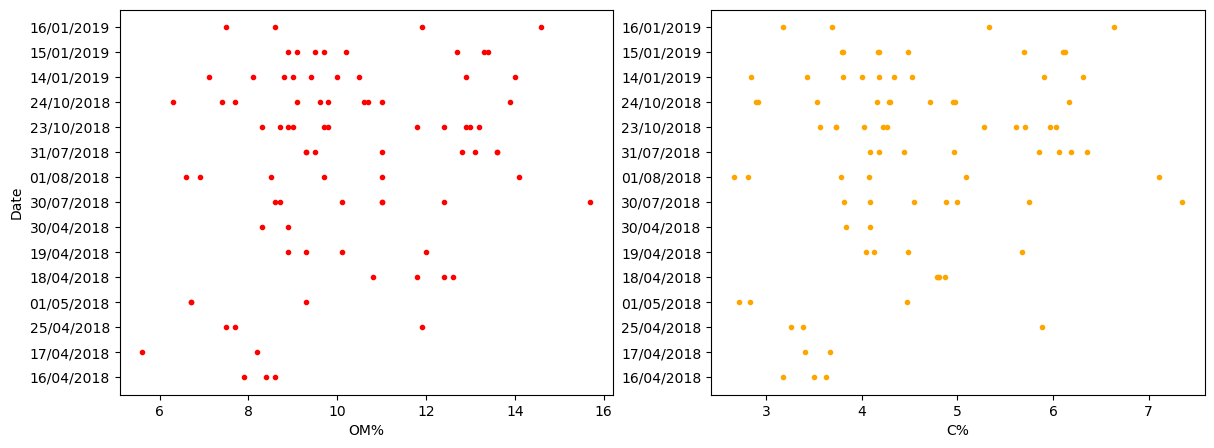

In [158]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2018['OM_%w/w'], field_2018['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2018['C_total_%w/w'], field_2018['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [159]:
# Get Field names
field_2018['Field'].unique()

array(['Pecketsford', 'Little Pecketsford', 'Great Field', 'Ware Park',
       'Poor Field', 'Lower Wheaty', 'Longlands East', 'Burrows',
       'Bottom Burrows', 'Orchard Dean North', 'Orchard Dean South',
       'Golden Rove', 'Dairy North', 'Longlands South', 'Lower Wyke Moor',
       'Middle Wyke Moor', 'Higher Wyke Moor', 'Dairy South',
       'Dairy Corner', 'Dairy East', 'Longlands North'], dtype=object)

In [160]:
# Exclude year 2019
field_2018_new = field_2018[field_2018['Sample_date'].str.contains("2019") == False]
field_2018_new['Sample_date'].unique()

array(['16/04/2018', '17/04/2018', '25/04/2018', '01/05/2018',
       '18/04/2018', '19/04/2018', '30/04/2018', '30/07/2018',
       '01/08/2018', '31/07/2018', '23/10/2018', '24/10/2018'],
      dtype=object)

In [161]:
# Average by field
field_2018 = field_2018_new.groupby(['Field']).mean().reset_index()
field_2018

,Field,SP_ID,sample_distance (m),Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,Bottom Burrows,2006.0,NaN,265504.9108,98413.20508,5.966667,2038.666667,12.200000,0.526667,5.386667
1,Burrows,2005.0,NaN,265644.2655,98312.28418,5.966667,2087.500000,12.766667,0.580000,5.813333
2,Dairy Corner,2014.0,NaN,266306.8935,98085.91182,5.866667,2039.333333,8.900000,0.433333,4.063333
3,Dairy East,2016.0,NaN,266335.1610,98244.47438,6.133333,2086.666667,8.300000,0.390000,3.660000
4,Dairy North,2017.0,NaN,266282.1266,98358.20591,5.866667,2024.333333,13.300000,0.666667,6.386667
5,Dairy South,2013.0,NaN,266152.0651,97968.50154,6.033333,2033.666667,10.500000,0.493333,4.740000
6,Golden Rove,2009.0,NaN,265953.4417,97967.65381,5.700000,2102.500000,12.700000,0.623333,5.903333
7,Great Field,2002.0,NaN,265690.1189,98829.40387,5.766667,2040.000000,9.433333,0.410000,4.036667
8,Higher Wyke Moor,2011.0,NaN,266172.6379,97629.41245,5.866667,2003.000000,9.333333,0.416667,4.156667
9,Little Pecketsford,68.0,NaN,265698.4474,99004.41039,5.766667,2042.333333,8.266667,0.370000,3.516667


In [162]:
# Create a new column with the year
field_2018.insert(3, 'Year', '2018')
field_2018.head()

,Field,SP_ID,sample_distance (m),Year,Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,Bottom Burrows,2006.0,NaN,2018,265504.9108,98413.20508,5.966667,2038.666667,12.200000,0.526667,5.386667
1,Burrows,2005.0,NaN,2018,265644.2655,98312.28418,5.966667,2087.500000,12.766667,0.580000,5.813333
2,Dairy Corner,2014.0,NaN,2018,266306.8935,98085.91182,5.866667,2039.333333,8.900000,0.433333,4.063333
3,Dairy East,2016.0,NaN,2018,266335.1610,98244.47438,6.133333,2086.666667,8.300000,0.390000,3.660000
4,Dairy North,2017.0,NaN,2018,266282.1266,98358.20591,5.866667,2024.333333,13.300000,0.666667,6.386667


In [163]:
# Export csv
field_2018.to_csv("C:/Users/neliq/Documents/NIF/Rothamsted/3.clean_data/field2018_clean.csv")

### Year 2019

In [166]:
## Load data
field_2019 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2019-01-01_2019-12-31.csv')

In [ ]:
# Check columns
field_2019.columns.tolist()

In [167]:
# Columns to keep
columns_to_keep2019 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [168]:
# Remobe other columns
field_2019 = field_2019[columns_to_keep2019]

In [169]:
# Dictionary with column names
dict_names_2019 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [170]:
# Rename columns
field_2019.rename(columns = dict_names_2019, inplace = True)

In [171]:
# A glimpse on the dataset
field_2019.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:01:00,265650.7,99239.591,NaN,NaN,NaN,NaN,NaN
1,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:02:00,265576.3,99180.488,NaN,NaN,NaN,NaN,NaN
2,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:03:00,265572.8,99122.300,NaN,NaN,NaN,NaN,NaN
3,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:04:00,265617.2,99169.389,NaN,NaN,NaN,NaN,NaN
4,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:05:00,265659.1,99203.655,NaN,NaN,NaN,NaN,NaN


In [172]:
# Info
field_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        403 non-null    object 
 1   SP_ID                403 non-null    int64  
 2   sample_distance (m)  27 non-null     float64
 3   Field                403 non-null    object 
 4   Sample_date          403 non-null    object 
 5   Sample_time          403 non-null    object 
 6   Easting              403 non-null    float64
 7   Northing             403 non-null    float64
 8   pH                   166 non-null    float64
 9   conductivity_uScm    162 non-null    float64
 10  OM_%w/w              166 non-null    float64
 11  N_total_%w/w         166 non-null    float64
 12  C_total_%w/w         166 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 41.1+ KB


In [173]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2019['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2019['C_total_%w/w'].isna().sum()))

There are 237 null values in the OM% column
There are 237 null values in the C% column


In [174]:
# Drop NAs
field_2019.dropna(subset = 'OM_%w/w', inplace = True)
field_2019.dropna(subset = 'C_total_%w/w', inplace = True)

In [175]:
# Check dataset again
field_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 237 to 402
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        166 non-null    object 
 1   SP_ID                166 non-null    int64  
 2   sample_distance (m)  0 non-null      float64
 3   Field                166 non-null    object 
 4   Sample_date          166 non-null    object 
 5   Sample_time          166 non-null    object 
 6   Easting              166 non-null    float64
 7   Northing             166 non-null    float64
 8   pH                   166 non-null    float64
 9   conductivity_uScm    162 non-null    float64
 10  OM_%w/w              166 non-null    float64
 11  N_total_%w/w         166 non-null    float64
 12  C_total_%w/w         166 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 18.2+ KB


In [176]:
# Check duplicates
bool_series_19 = field_2019[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_19.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

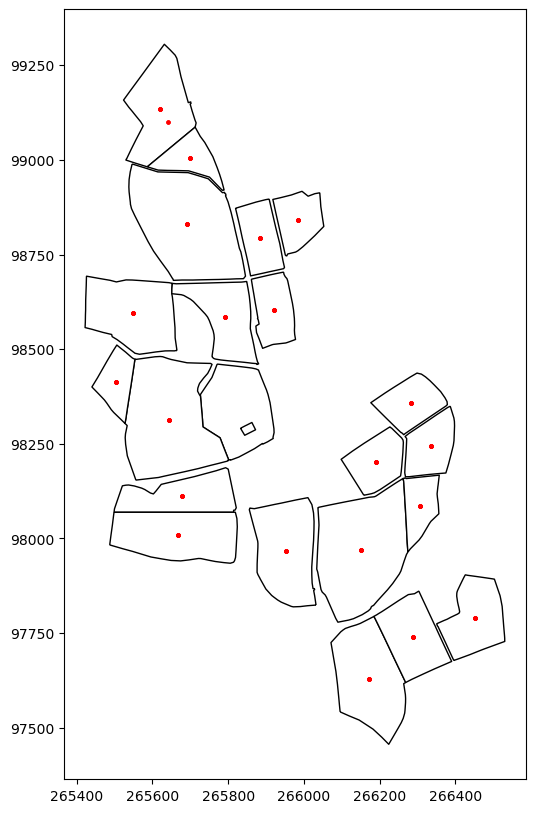

In [177]:
# Plot points
field_2019_gp = gp.GeoDataFrame(field_2019, geometry = gp.points_from_xy(field_2019.Easting, field_2019.Northing))
area = gp.read_file('C:/Users/neliq/Documents/NIF/Rothamsted/2.shapefiles/area_field.shp')
area_plot = area.plot(color = 'white', ec = 'black', figsize = (8,10))
field_2019_gp.plot(ax = area_plot, markersize=5, color = 'red')
plt.show()

In [106]:
# Convert object to datetime
#field_2019['Sample_date'] = pd.to_datetime(field_2019['Sample_date'])

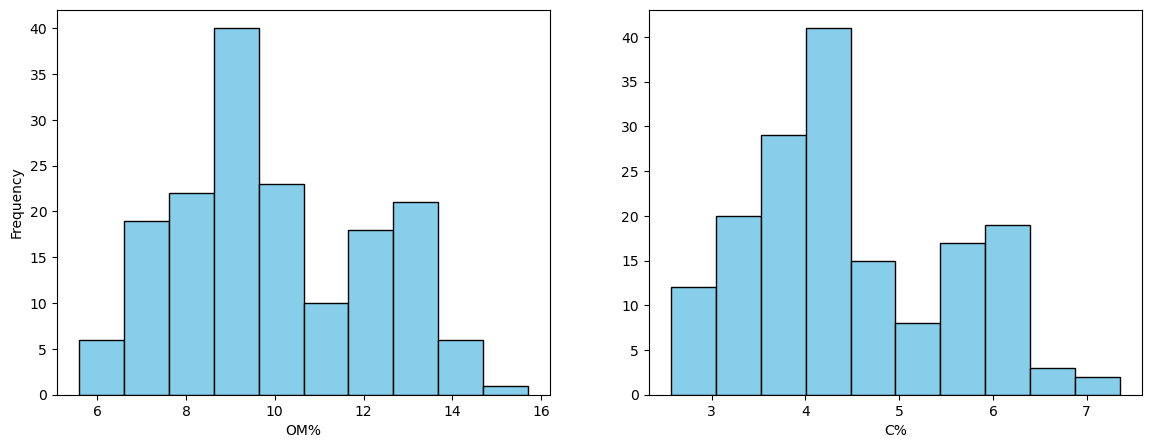

In [178]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2019['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue')
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2019['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue')
plt.xlabel('C%')
plt.ylabel('')
plt.show()

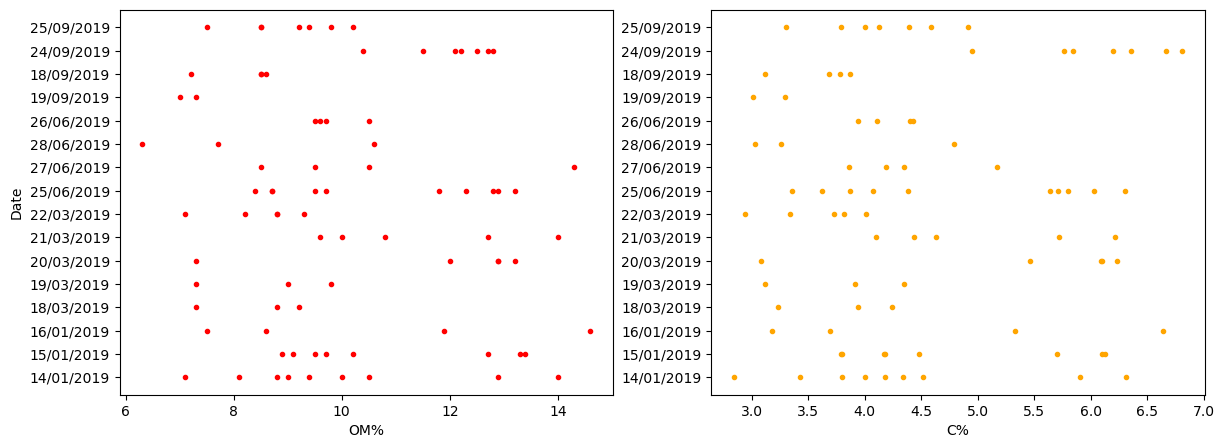

In [183]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2019_new['OM_%w/w'], field_2019_new['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2019_new['C_total_%w/w'], field_2019_new['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [180]:
# Get Field names
field_2019['Field'].unique()

array(['Pecketsford', 'Little Pecketsford', 'Great Field', 'Ware Park',
       'Poor Field', 'Lower Wheaty', 'Longlands East', 'Burrows',
       'Bottom Burrows', 'Orchard Dean North', 'Orchard Dean South',
       'Golden Rove', 'Dairy North', 'Longlands South', 'Lower Wyke Moor',
       'Middle Wyke Moor', 'Higher Wyke Moor', 'Dairy South',
       'Dairy Corner', 'Dairy East', 'Longlands North',
       'Pecketsford (whole)'], dtype=object)

In [181]:
# Replace Field names
field_2019['Field'].replace(['Pecketsford (whole)'],
                            ['Pecketsford'], inplace = True)

In [182]:
# Exclude year 2018-2020
field_2019_new = field_2019[field_2019['Sample_date'].str.contains('2018') == False]
field_2019_new = field_2019_new[field_2019_new['Sample_date'].str.contains('2020') == False]
field_2019_new['Sample_date'].unique()

array(['14/01/2019', '15/01/2019', '16/01/2019', '18/03/2019',
       '19/03/2019', '20/03/2019', '21/03/2019', '22/03/2019',
       '25/06/2019', '27/06/2019', '28/06/2019', '26/06/2019',
       '19/09/2019', '18/09/2019', '24/09/2019', '25/09/2019'],
      dtype=object)

In [184]:
# Count number of obsrvations per field and take the mean
field_2019 = field_2019_new.groupby(['Field']).mean().reset_index()
field_2019

,Field,SP_ID,sample_distance (m),Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,Bottom Burrows,2006.0,NaN,265504.910200,98413.208770,5.975000,2095.500000,12.050000,0.54600,5.710000
1,Burrows,2005.0,NaN,265644.268875,98312.281045,5.925000,2094.250000,12.850000,0.59725,6.010000
2,Dairy Corner,2014.0,NaN,266306.890875,98085.910455,6.200000,2070.250000,8.925000,0.42200,4.025000
3,Dairy East,2016.0,NaN,266335.160250,98244.471095,6.300000,2087.750000,8.450000,0.39850,3.752500
4,Dairy North,2017.0,NaN,266282.129150,98358.208978,6.100000,2073.250000,13.900000,0.64850,6.097500
5,Dairy South,2013.0,NaN,266152.068775,97968.500385,6.025000,2061.500000,9.575000,0.44225,4.227500
6,Golden Rove,2009.0,NaN,265953.440425,97967.650953,6.125000,2048.250000,12.575000,0.58750,5.815000
7,Great Field,2002.0,NaN,265690.119725,98829.400967,5.950000,2037.250000,8.475000,0.37675,3.750000
8,Higher Wyke Moor,2011.0,NaN,266172.639475,97629.410613,5.925000,2045.750000,9.375000,0.40550,4.147500
9,Little Pecketsford,68.0,NaN,265698.449133,99004.410130,6.066667,2061.666667,8.033333,0.35400,3.426667


In [185]:
# Create a new column with the year
field_2019.insert(3, 'Year', '2019')
field_2019.head()

,Field,SP_ID,sample_distance (m),Year,Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,Bottom Burrows,2006.0,NaN,2019,265504.910200,98413.208770,5.975,2095.50,12.050,0.54600,5.7100
1,Burrows,2005.0,NaN,2019,265644.268875,98312.281045,5.925,2094.25,12.850,0.59725,6.0100
2,Dairy Corner,2014.0,NaN,2019,266306.890875,98085.910455,6.200,2070.25,8.925,0.42200,4.0250
3,Dairy East,2016.0,NaN,2019,266335.160250,98244.471095,6.300,2087.75,8.450,0.39850,3.7525
4,Dairy North,2017.0,NaN,2019,266282.129150,98358.208978,6.100,2073.25,13.900,0.64850,6.0975


In [186]:
# Export csv
field_2019.to_csv("C:/Users/neliq/Documents/NIF/Rothamsted/3.clean_data/field2019_clean.csv")

### Year 2020

In [187]:
## Load data
field_2020 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2020-01-01_2020-12-31.csv')

In [ ]:
# Check the columns
field_2020.columns

In [189]:
# Columns to keep
columns_to_keep2020 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [190]:
# Dictionary with names
dict_names_2020 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [191]:
# Remove other columns
field_2020 = field_2020[columns_to_keep2020]

In [192]:
# Rename columns
field_2020.rename(columns = dict_names_2020, inplace = True)

In [193]:
# A glimpse on the dataset
field_2020.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,NW702-S,19,NaN,Pecketsford,18/03/2019,12:00:00,265618.86,99134.54,6.3,2047,9.2,0.412,4.24
1,NW702-S,68,NaN,Little Pecketsford,18/03/2019,12:00:00,265698.45,99004.41,6.0,2041,7.3,0.342,3.23
2,NW702-S,2002,NaN,Great Field,18/03/2019,12:00:00,265690.12,98829.40,6.0,2020,8.8,0.394,3.94
3,NW702-S,2004,NaN,Ware Park,19/03/2019,12:00:00,265791.65,98584.10,6.0,2025,7.3,0.322,3.12
4,NW702-S,2003,NaN,Poor Field,19/03/2019,12:00:00,265547.77,98594.88,6.1,2017,9.8,0.423,4.35


In [194]:
# Info
field_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        142 non-null    object 
 1   SP_ID                142 non-null    int64  
 2   sample_distance (m)  0 non-null      float64
 3   Field                142 non-null    object 
 4   Sample_date          142 non-null    object 
 5   Sample_time          142 non-null    object 
 6   Easting              142 non-null    float64
 7   Northing             142 non-null    float64
 8   pH                   142 non-null    float64
 9   conductivity_uScm    142 non-null    int64  
 10  OM_%w/w              142 non-null    float64
 11  N_total_%w/w         142 non-null    float64
 12  C_total_%w/w         142 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 14.5+ KB


In [195]:
# Check duplicates
bool_series_20 = field_2020[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_20.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [196]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2020['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2020['C_total_%w/w'].isna().sum()))

There are 0 null values in the OM% column
There are 0 null values in the C% column


In [197]:
# Check dataset again
field_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        142 non-null    object 
 1   SP_ID                142 non-null    int64  
 2   sample_distance (m)  0 non-null      float64
 3   Field                142 non-null    object 
 4   Sample_date          142 non-null    object 
 5   Sample_time          142 non-null    object 
 6   Easting              142 non-null    float64
 7   Northing             142 non-null    float64
 8   pH                   142 non-null    float64
 9   conductivity_uScm    142 non-null    int64  
 10  OM_%w/w              142 non-null    float64
 11  N_total_%w/w         142 non-null    float64
 12  C_total_%w/w         142 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 14.5+ KB


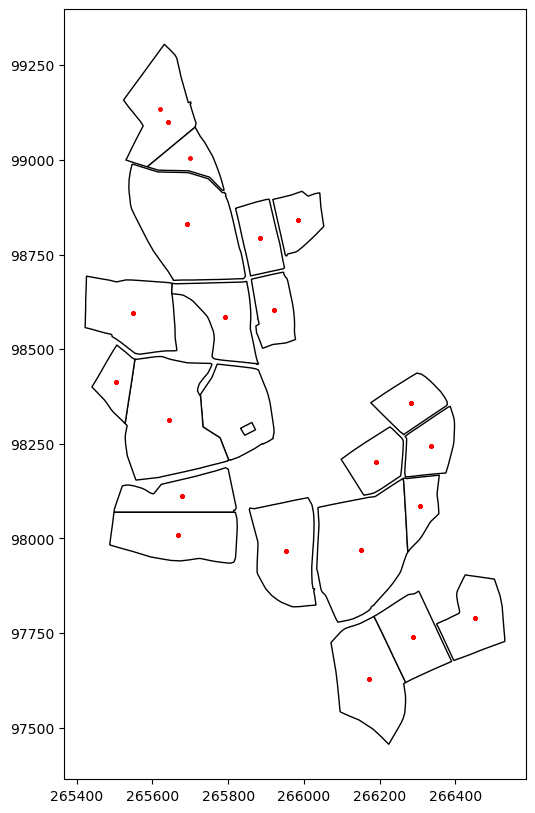

In [198]:
# Plot points
field_2020_gp = gp.GeoDataFrame(field_2020, geometry = gp.points_from_xy(field_2020.Easting, field_2020.Northing))
area = gp.read_file('C:/Users/neliq/Documents/NIF/Rothamsted/2.shapefiles/area_field.shp')
area_plot = area.plot(color = 'white', ec = 'black', figsize = (8,10))
field_2020_gp.plot(ax = area_plot, markersize=5, color = 'red')
plt.show()

In [121]:
# Convert object to datetime
#field_2020['Sample_date'] = pd.to_datetime(field_2020['Sample_date'])

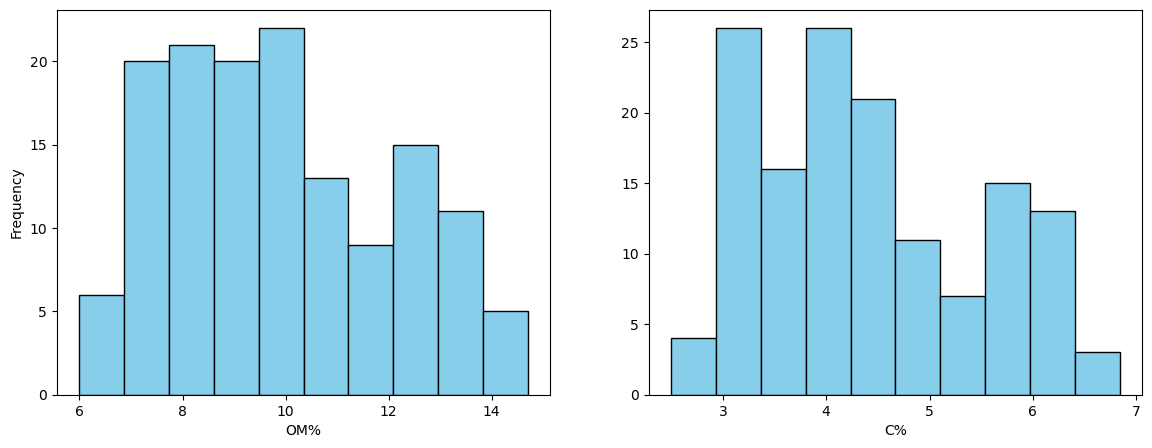

In [199]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2020['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue')
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2020['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue')
plt.xlabel('C%')
plt.ylabel('')
plt.show()

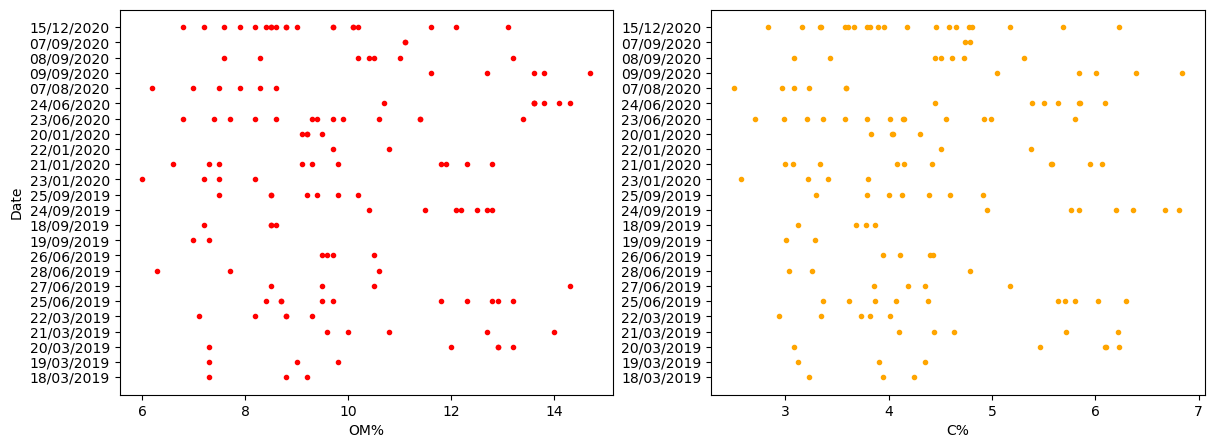

In [200]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2020['OM_%w/w'], field_2020['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2020['C_total_%w/w'], field_2020['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [201]:
# Get Field names
field_2020['Field'].unique()

array(['Pecketsford', 'Little Pecketsford', 'Great Field', 'Ware Park',
       'Poor Field', 'Lower Wheaty', 'Longlands East', 'Burrows',
       'Bottom Burrows', 'Orchard Dean North', 'Orchard Dean South',
       'Golden Rove', 'Dairy North', 'Longlands South', 'Lower Wyke Moor',
       'Middle Wyke Moor', 'Higher Wyke Moor', 'Dairy South',
       'Dairy Corner', 'Dairy East', 'Longlands North',
       'Pecketsford (whole)'], dtype=object)

In [202]:
# Replace Field names
field_2020['Field'].replace(['Pecketsford (whole)'],
                            ['Pecketsford'], inplace = True)

In [203]:
# Exclude year 2018-2020
field_2020_new = field_2020[field_2020['Sample_date'].str.contains('2019') == False]
field_2020_new['Sample_date'].unique()

array(['23/01/2020', '21/01/2020', '22/01/2020', '20/01/2020',
       '23/06/2020', '24/06/2020', '07/08/2020', '09/09/2020',
       '08/09/2020', '07/09/2020', '15/12/2020'], dtype=object)

In [204]:
# Count number of obsrvations per field and take the mean
field_2020 = field_2020_new.groupby(['Field']).mean().reset_index()
field_2020

,Field,SP_ID,sample_distance (m),Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,Bottom Burrows,2006.0,NaN,265504.910200,98413.208770,6.400,2039.00,10.850,0.49000,4.7975
1,Burrows,2005.0,NaN,265644.268875,98312.281045,6.325,2062.00,12.325,0.56350,5.7800
2,Dairy Corner,2014.0,NaN,266306.890875,98085.910455,6.025,2060.50,9.625,0.46625,4.2575
3,Dairy East,2016.0,NaN,266335.160250,98244.471095,6.175,2059.25,9.075,0.43075,3.9000
4,Dairy North,2017.0,NaN,266282.129150,98358.208978,5.875,2076.75,12.925,0.62425,5.4550
5,Dairy South,2013.0,NaN,266152.068775,97968.500385,6.025,2041.75,10.000,0.48075,4.4225
6,Golden Rove,2009.0,NaN,265953.440425,97967.650953,6.075,2041.25,12.250,0.59975,5.4025
7,Great Field,2002.0,NaN,265690.119450,98829.401935,6.675,2048.00,6.725,0.31325,2.7775
8,Higher Wyke Moor,2011.0,NaN,266172.639475,97629.410613,5.900,2022.00,9.975,0.43800,4.3325
9,Longlands East,2020.0,NaN,265985.610200,98842.008005,6.650,2045.75,7.425,0.35375,3.1225


In [205]:
# Create a new column with the year
field_2020.insert(3, 'Year', '2020')
field_2020.head()

,Field,SP_ID,sample_distance (m),Year,Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,Bottom Burrows,2006.0,NaN,2020,265504.910200,98413.208770,6.400,2039.00,10.850,0.49000,4.7975
1,Burrows,2005.0,NaN,2020,265644.268875,98312.281045,6.325,2062.00,12.325,0.56350,5.7800
2,Dairy Corner,2014.0,NaN,2020,266306.890875,98085.910455,6.025,2060.50,9.625,0.46625,4.2575
3,Dairy East,2016.0,NaN,2020,266335.160250,98244.471095,6.175,2059.25,9.075,0.43075,3.9000
4,Dairy North,2017.0,NaN,2020,266282.129150,98358.208978,5.875,2076.75,12.925,0.62425,5.4550


In [206]:
# Export csv
field_2020.to_csv("C:/Users/neliq/Documents/NIF/Rothamsted/3.clean_data/field2020_clean.csv")

### Year 2021

In [207]:
## Load data
field_2021 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2021-01-01_2021-12-31.csv')

In [ ]:
# Check the columns
field_2021.columns

In [208]:
# Columns to keep
columns_to_keep2021 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field',  'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [209]:
# Dictionary with names
dict_names_2021 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [210]:
# Remove other columns
field_2021 = field_2021[columns_to_keep2021]

In [211]:
# Rename columns
field_2021.rename(columns = dict_names_2021, inplace = True)

In [212]:
# A glimpse on the dataset
field_2021.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,NW752-2SP-1,2011,NaN,Higher Wyke Moor,03/09/2021,12:00:00,266114.792,97558.471,NaN,NaN,NaN,NaN,NaN
1,NW752-2SP-1,2012,NaN,Middle Wyke Moor,03/09/2021,12:00:00,266371.050,97681.779,NaN,NaN,NaN,NaN,NaN
2,NW752-2SP-1,2010,NaN,Lower Wyke Moor,14/09/2021,12:00:00,266432.495,97871.352,NaN,NaN,NaN,NaN,NaN
3,NW752-2SP-1,2013,NaN,Dairy South,14/09/2021,12:00:00,266062.963,98059.804,NaN,NaN,NaN,NaN,NaN
4,NW752-2SP-1,2016,NaN,Dairy East,13/09/2021,12:00:00,266285.532,98180.026,NaN,NaN,NaN,NaN,NaN


In [213]:
# Check duplicates
bool_series_21 = field_2021[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_21.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [214]:
# Check NAs in OM% and C%
print('There are {} null values in the OM% column'.format(field_2021['OM_%w/w'].isna().sum()))
print('There are {} null values in the C% column'.format(field_2021['C_total_%w/w'].isna().sum()))

There are 126 null values in the OM% column
There are 126 null values in the C% column


In [215]:
# Drop NA
field_2021.dropna(subset = 'OM_%w/w', inplace = True)
field_2021.dropna(subset = 'C_total_%w/w', inplace = True)

In [216]:
# Check dataset again
field_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 126 to 205
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        80 non-null     object 
 1   SP_ID                80 non-null     int64  
 2   sample_distance (m)  0 non-null      float64
 3   Field                80 non-null     object 
 4   Sample_date          80 non-null     object 
 5   Sample_time          80 non-null     object 
 6   Easting              80 non-null     float64
 7   Northing             80 non-null     float64
 8   pH                   80 non-null     float64
 9   conductivity_uScm    80 non-null     float64
 10  OM_%w/w              80 non-null     float64
 11  N_total_%w/w         80 non-null     float64
 12  C_total_%w/w         80 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.8+ KB


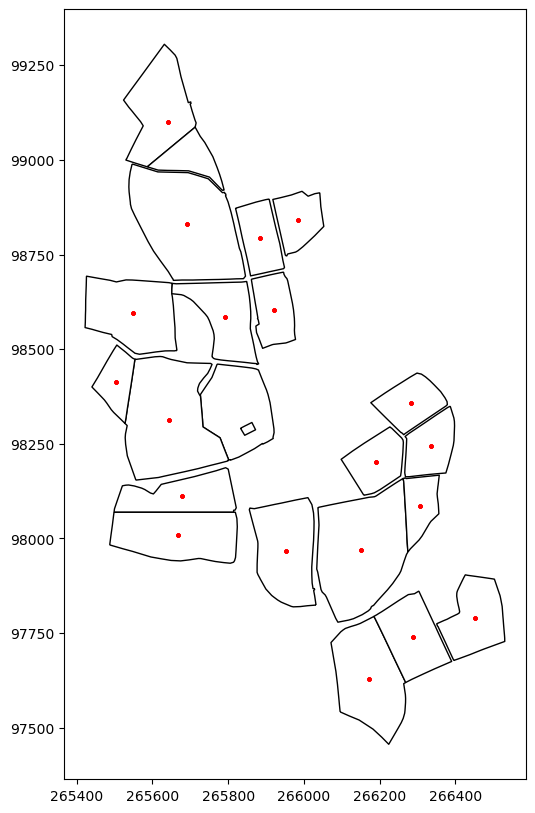

In [217]:
# Plot points
field_2021_gp = gp.GeoDataFrame(field_2021, geometry = gp.points_from_xy(field_2021.Easting, field_2021.Northing))
area = gp.read_file('C:/Users/neliq/Documents/NIF/Rothamsted/2.shapefiles/area_field.shp')
area_plot = area.plot(color = 'white', ec = 'black', figsize = (8,10))
field_2021_gp.plot(ax = area_plot, markersize=5, color = 'red')
plt.show()

In [251]:
# Convert object to datetime
#field_2021['Sample_date'] = pd.to_datetime(field_2021['Sample_date'])

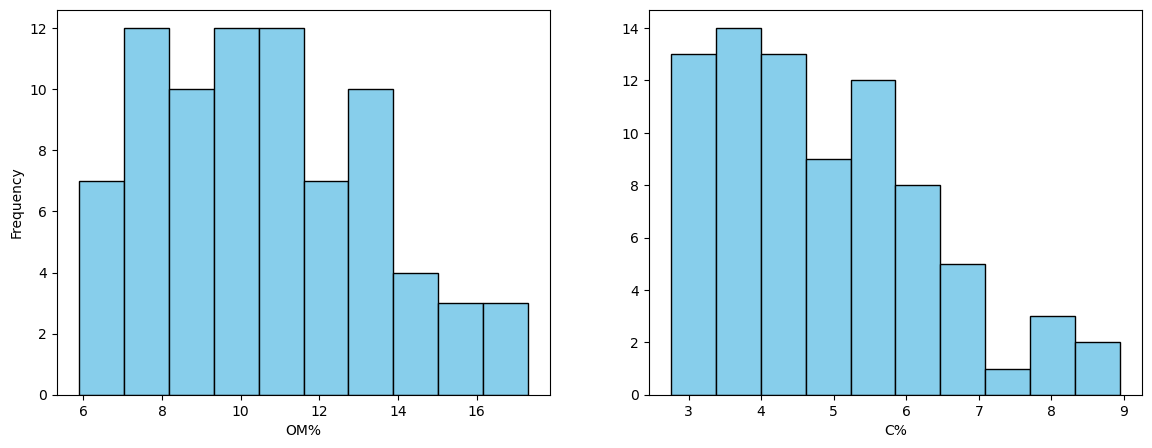

In [218]:
# Plot OM% and C% distribution
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
field_2021['OM_%w/w'].plot(kind = 'hist', ec = 'black', color = 'skyblue')
plt.xlabel('OM%')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
field_2021['C_total_%w/w'].plot(kind = 'hist', ec = 'black',color = 'skyblue')
plt.xlabel('C%')
plt.ylabel('')
plt.show()

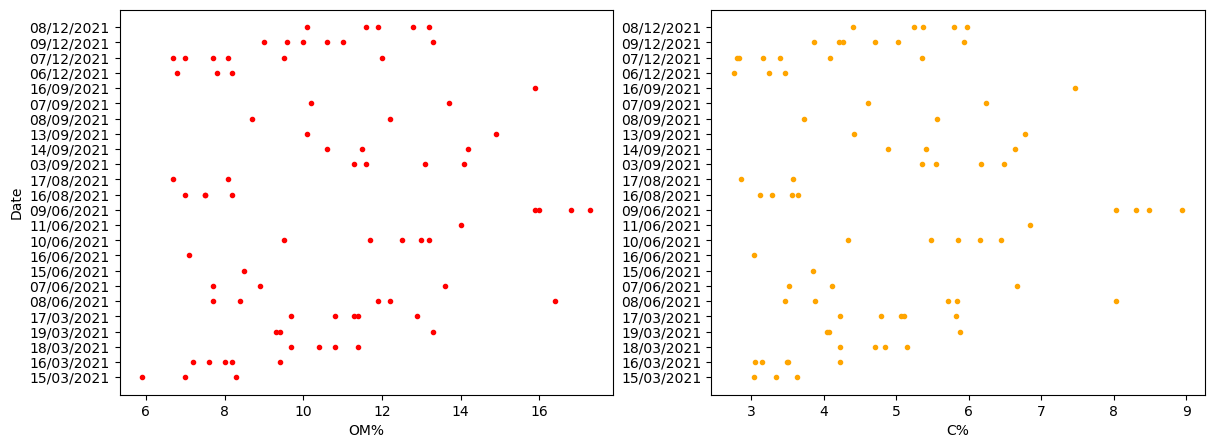

In [219]:
# Plot samples per date
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(field_2021['OM_%w/w'], field_2021['Sample_date'], 'o', color = 'red', markersize=3)
plt.xlabel('OM%')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
plt.plot(field_2021['C_total_%w/w'], field_2021['Sample_date'], 'o', color = 'orange', markersize=3)
plt.xlabel('C%')
plt.ylabel('')

plt.show()

In [220]:
# Get Field names
field_2021['Field'].unique()

array(['Pecketsford (whole)', 'Great Field', 'Poor Field', 'Ware Park',
       'Lower Wheaty', 'Longlands East', 'Higher Wyke Moor',
       'Middle Wyke Moor', 'Lower Wyke Moor', 'Dairy South', 'Dairy East',
       'Dairy Corner', 'Longlands North', 'Bottom Burrows', 'Burrows',
       'Golden Rove', 'Orchard Dean North', 'Orchard Dean South',
       'Dairy North', 'Longlands South'], dtype=object)

In [221]:
# Replace Field names
field_2021['Field'].replace(['Pecketsford (whole)'],
                            ['Pecketsford'], inplace = True)

In [222]:
field_2021['Sample_date'].unique()

array(['15/03/2021', '16/03/2021', '18/03/2021', '19/03/2021',
       '17/03/2021', '08/06/2021', '07/06/2021', '15/06/2021',
       '16/06/2021', '10/06/2021', '11/06/2021', '09/06/2021',
       '16/08/2021', '17/08/2021', '03/09/2021', '14/09/2021',
       '13/09/2021', '08/09/2021', '07/09/2021', '16/09/2021',
       '06/12/2021', '07/12/2021', '09/12/2021', '08/12/2021'],
      dtype=object)

In [223]:
# Count number of obsrvations per field and take the mean
field_2021 = field_2021.groupby(['Field']).mean().reset_index()
field_2021

,Field,SP_ID,sample_distance (m),Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,Bottom Burrows,2006.0,NaN,265504.9108,98413.20508,5.875,2012.75,12.250,0.55625,5.6200
1,Burrows,2005.0,NaN,265644.2655,98312.28418,5.825,2021.50,13.875,0.65675,6.5925
2,Dairy Corner,2014.0,NaN,266306.8935,98085.91182,5.850,2030.00,10.450,0.49825,4.7325
3,Dairy East,2016.0,NaN,266335.1610,98244.47438,5.950,2024.75,10.250,0.47000,4.5975
4,Dairy North,2017.0,NaN,266282.1266,98358.20591,5.850,2053.75,14.475,0.70800,6.6550
5,Dairy South,2013.0,NaN,266152.0651,97968.50154,5.975,2017.75,11.725,0.55075,5.4525
6,Golden Rove,2009.0,NaN,265953.4417,97967.65381,5.725,2026.50,13.250,0.62675,6.2450
7,Great Field,2002.0,NaN,265690.1189,98829.40387,6.425,2020.25,7.250,0.35675,3.2125
8,Higher Wyke Moor,2011.0,NaN,266172.6379,97629.41245,5.900,1994.25,10.625,0.47650,4.8250
9,Longlands East,2020.0,NaN,265985.6104,98842.00601,6.325,2005.50,7.000,0.33875,2.9375


In [224]:
# Create a new column with the year
field_2021.insert(3, 'Year', '2021')
field_2021.head()

,Field,SP_ID,sample_distance (m),Year,Easting,Northing,pH,conductivity_uScm,OM_%w/w,N_total_%w/w,C_total_%w/w
0,Bottom Burrows,2006.0,NaN,2021,265504.9108,98413.20508,5.875,2012.75,12.250,0.55625,5.6200
1,Burrows,2005.0,NaN,2021,265644.2655,98312.28418,5.825,2021.50,13.875,0.65675,6.5925
2,Dairy Corner,2014.0,NaN,2021,266306.8935,98085.91182,5.850,2030.00,10.450,0.49825,4.7325
3,Dairy East,2016.0,NaN,2021,266335.1610,98244.47438,5.950,2024.75,10.250,0.47000,4.5975
4,Dairy North,2017.0,NaN,2021,266282.1266,98358.20591,5.850,2053.75,14.475,0.70800,6.6550


In [225]:
# Export csv
field_2021.to_csv("C:/Users/neliq/Documents/NIF/Rothamsted/3.clean_data/field2021_clean.csv")

### Joining all the datasets

In [401]:
# Create a list with 
list_df = [field_2012, field_2016, field_2018, field_2019, field_2020, field_2021]

In [402]:
# Concatenate the list
result_df = pd.concat(list_df)

In [403]:
result_df.shape

(693, 15)

In [404]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 19
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        611 non-null    object 
 1   SP_ID                693 non-null    float64
 2   sample_distance (m)  611 non-null    float64
 3   Field                693 non-null    object 
 4   Sample_date          611 non-null    object 
 5   Sample_time          611 non-null    object 
 6   Easting              693 non-null    float64
 7   Northing             693 non-null    float64
 8   pH                   692 non-null    float64
 9   BD_gcm3              607 non-null    float64
 10  OM_%w/w              693 non-null    float64
 11  N_total_%w/w         693 non-null    float64
 12  C_total_%w/w         693 non-null    float64
 13  Year                 693 non-null    object 
 14  conductivity_uScm    82 non-null     float64
dtypes: float64(10), object(5)
memory usage: 8

In [405]:
# A glimpse on the concatenated data
result_df

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,Year,conductivity_uScm
0,FP003,1.0,50.0,Pecketsford,06/06/2012,12:00:00,265632.0000,99300.00000,5.180,0.916,10.100,0.51000,4.7420,2012,NaN
1,FP003,2.0,50.0,Pecketsford,06/06/2012,12:00:00,265625.0000,99275.00000,5.230,0.943,10.400,0.55000,4.9800,2012,NaN
2,FP003,7.0,50.0,Pecketsford,06/06/2012,12:00:00,265575.0000,99225.00000,5.540,0.948,11.800,0.64000,5.6100,2012,NaN
3,FP003,9.0,50.0,Pecketsford,06/06/2012,12:00:00,265625.0000,99225.00000,5.120,0.857,10.900,0.54000,4.5100,2012,NaN
4,FP003,17.0,50.0,Pecketsford,06/06/2012,12:00:00,265575.0000,99175.00000,5.680,0.946,11.500,0.59000,5.3400,2012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,NaN,2007.0,NaN,Orchard Dean North,NaN,NaN,265678.1911,98112.25632,5.725,NaN,14.375,0.68875,6.8025,2021,2032.75
16,NaN,2008.0,NaN,Orchard Dean South,NaN,NaN,265666.1468,98008.84146,5.775,NaN,13.300,0.63525,6.2825,2021,2023.00
17,NaN,2001.0,NaN,Pecketsford,NaN,NaN,265640.4715,99099.20063,6.525,NaN,7.400,0.36250,3.4300,2021,2041.50
18,NaN,2003.0,NaN,Poor Field,NaN,NaN,265547.7653,98594.87595,6.425,NaN,8.300,0.39275,3.6625,2021,2028.75


In [406]:
# Check duplicates
result_df['duplicated'] = result_df[['Year','Easting', 'Northing']].duplicated()

In [408]:
result_df_without_duplicates = result_df[result_df['duplicated'] == False].reset_index(drop = True)

In [409]:
result_df_without_duplicates.shape

(692, 16)

In [410]:
result_df.to_csv('final_table_RR.csv', index = False)

In [411]:
# Info
result_df_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        610 non-null    object 
 1   SP_ID                692 non-null    float64
 2   sample_distance (m)  610 non-null    float64
 3   Field                692 non-null    object 
 4   Sample_date          610 non-null    object 
 5   Sample_time          610 non-null    object 
 6   Easting              692 non-null    float64
 7   Northing             692 non-null    float64
 8   pH                   691 non-null    float64
 9   BD_gcm3              606 non-null    float64
 10  OM_%w/w              692 non-null    float64
 11  N_total_%w/w         692 non-null    float64
 12  C_total_%w/w         692 non-null    float64
 13  Year                 692 non-null    object 
 14  conductivity_uScm    82 non-null     float64
 15  duplicated           692 non-null    boo

In [412]:
result_df_without_duplicates.drop(columns = ['duplicated'], axis = 1, inplace = True)

In [413]:
# Count the numbers of NAs in C%
result_df_without_duplicates['C_total_%w/w'].isnull().sum()

0

In [414]:
# Count the numbers of NAs in OM%
result_df_without_duplicates['OM_%w/w'].isnull().sum()

0

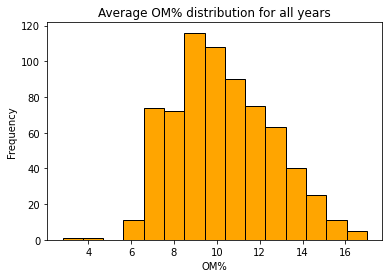

In [415]:
# Plot OM% distribution
result_df_without_duplicates['OM_%w/w'].plot(kind = 'hist', ec = 'black', bins = 15, color = 'orange')
plt.title('Average OM% distribution for all years')
plt.xlabel('OM%')
plt.ylabel('Frequency')
plt.show()

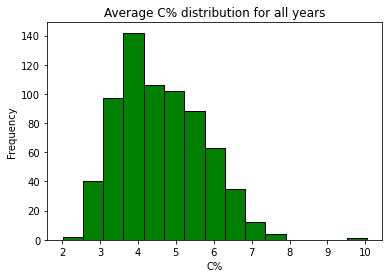

In [416]:
# Plot OM% distribution
result_df_without_duplicates['C_total_%w/w'].plot(kind = 'hist', ec = 'black', bins = 15, color = 'green')
plt.title('Average C% distribution for all years')
plt.xlabel('C%')
plt.ylabel('Frequency')
plt.show()

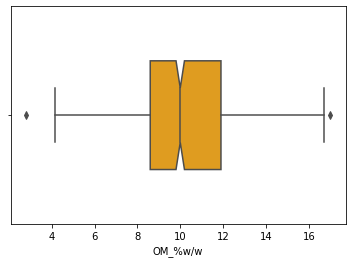

In [417]:
# Plot boxplot
sns.boxplot(result_df_without_duplicates['OM_%w/w'], notch = True, width=0.5, orient = 'h', color = 'orange')
plt.show()

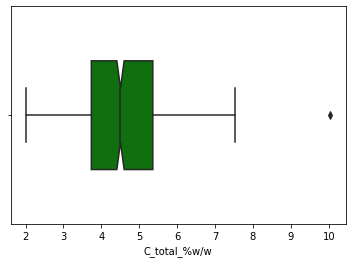

In [418]:
sns.boxplot(result_df_without_duplicates['C_total_%w/w'], notch = True, width=0.5, orient = 'h', color = 'green')
plt.show()

In [440]:
# Group by date and create summary statistics
summary_dat = result_df_without_duplicates.groupby(result_df_without_duplicates['Year'])['C_total_%w/w'].agg(['min', 'mean', 'median', 'max','std', 'count']).reset_index()

In [441]:
# A glimpse on the summary statistics
summary_dat

,Year,min,mean,median,max,std,count
0,2012,2.6900,4.616015,4.657000,10.040000,0.928946,263
1,2016,2.0110,4.575089,4.275000,7.519000,1.230368,347
2,2018,2.8000,4.499365,4.296667,6.386667,1.006233,21
3,2019,3.1575,4.516746,4.147500,6.367500,1.068058,21
4,2020,2.7775,4.344000,4.326250,6.080000,0.978009,20
5,2021,2.9375,4.845125,4.885000,6.802500,1.275568,20


In [421]:
# Save to csv
summary_dat.to_csv('summary_stats_per_year.csv', index = False)

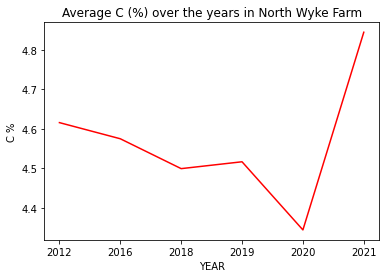

In [428]:
# Plot mean and count per year
plt.figure(figsize=(6,4))
plt.plot(summary_dat['Year'], summary_dat['mean'], color = 'red')
plt.xlabel('YEAR')
plt.ylabel('C %')

plt.title('Average C (%) over the years in North Wyke Farm')
plt.show()

In [433]:
# Set year to datetime
summary_dat['Year'] = summary_dat['Year'].astype('datetime64[ns]')


In [443]:
group_year = summary_dat

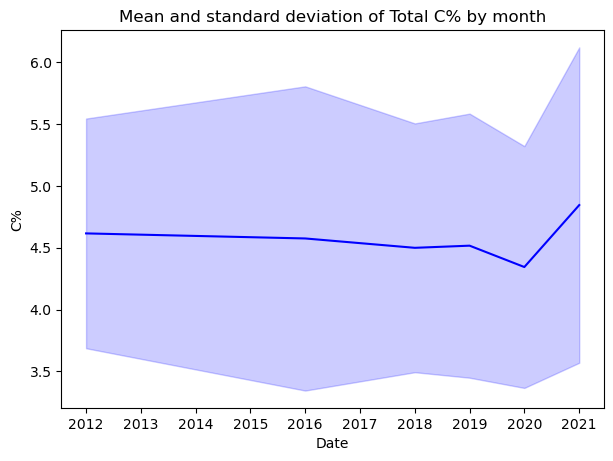

In [434]:
## Plot
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(group_year['Year'], group_year['mean'], color = 'blue')
plt.fill_between(group_year['Year'], (group_year['mean']+group_year['std']), 
                 (group_year['mean']-group_year['std']), alpha = 0.2, color = 'blue')
plt.title("Mean and standard deviation of Total C% by month")
plt.xlabel("Date")
plt.ylabel("C%")
plt.savefig('average_C_by_year.png', dpi=300)

plt.show()

In [436]:
diff = group_year['mean'][5] - group_year['mean'][0]
print('The change in C% in nine years was {}%'.format(round(diff,2)))

The change in C% in nine years was 0.23%


### Save files by month-year

In [445]:
for i in range(len(group_year)):
    files = result_df_without_duplicates.loc[result_df_without_duplicates['Year'] == str(group_year['Year'][i]).split()[0]]
    files.to_csv("files_{}.csv".format(str(group_year['Year'][i]).split()[0]), index = False)

### Group by field and plot

In [446]:
dat_by_field = result_df_without_duplicates.groupby(['Field']).mean().sort_values(by = 'C_total_%w/w', ascending = False).reset_index()
dat_by_field.head()

,Field,SP_ID,sample_distance (m),Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm
0,Dairy North,1146.787879,30.172414,266283.258364,98356.295325,5.725202,0.920345,13.792424,0.666528,6.185763,2057.020833
1,Orchard Dean North,716.655172,50.000000,265658.198716,98104.276924,5.738988,0.929200,12.180839,0.620580,5.733828,2054.500000
2,Golden Rove,798.645161,49.074074,265948.960137,97974.922888,5.617581,0.899654,12.241774,0.609011,5.581349,2054.625000
3,Orchard Dean South,769.428571,50.000000,265652.306857,98001.262988,5.724762,0.871333,11.974345,0.587619,5.545024,2051.083333
4,Burrows,511.765957,50.000000,265646.852527,98316.470861,5.754929,0.909442,11.784184,0.589543,5.484996,2066.312500


In [447]:
dat_by_field['C_total_%w/w'] = dat_by_field['C_total_%w/w'].round(2)

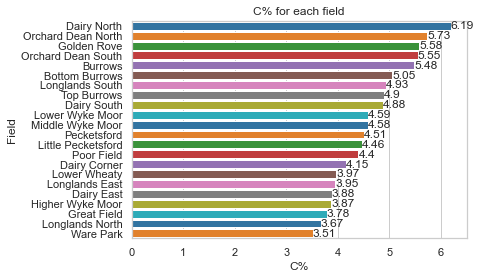

In [454]:
sns.set(style="whitegrid", font_scale=1)
ax = sns.barplot(y = dat_by_field['Field'], x = dat_by_field['C_total_%w/w'], palette = "tab10")
plt.title('C% for each field')
ax.bar_label(ax.containers[0])
plt.xlabel('C%')
plt.show()

### Select fields and plot by years

In [449]:
group_by_field_year = result_df_without_duplicates.groupby(['Year','Field']).mean().reset_index()
group_by_field_year['C_total_%w/w'] = group_by_field_year['C_total_%w/w'].round(2)
group_by_field_year

,Year,Field,SP_ID,sample_distance (m),Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm
0,2012,Bottom Burrows,312.666667,50.0,265508.333333,98400.000000,5.616667,0.885833,8.616667,0.488500,4.20,NaN
1,2012,Burrows,373.666667,50.0,265650.000000,98314.583333,5.664167,0.906917,8.958333,0.540917,4.43,NaN
2,2012,Dairy Corner,845.600000,50.0,266320.000000,98085.000000,5.576000,0.857200,9.560000,0.537200,4.29,NaN
3,2012,Dairy East,962.714286,50.0,266328.571429,98239.285714,5.404286,0.906857,11.971429,0.624286,5.51,NaN
4,2012,Dairy North,1024.333333,50.0,266291.666667,98366.666667,5.785000,0.920000,12.466667,0.655333,5.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
120,2021,Orchard Dean North,2007.000000,NaN,265678.191100,98112.256320,5.725000,NaN,14.375000,0.688750,6.80,2032.75
121,2021,Orchard Dean South,2008.000000,NaN,265666.146800,98008.841460,5.775000,NaN,13.300000,0.635250,6.28,2023.00
122,2021,Pecketsford,2001.000000,NaN,265640.471500,99099.200630,6.525000,NaN,7.400000,0.362500,3.43,2041.50
123,2021,Poor Field,2003.000000,NaN,265547.765300,98594.875950,6.425000,NaN,8.300000,0.392750,3.66,2028.75


In [450]:
list_vc = group_by_field_year.Field.value_counts().loc[lambda x: x>4].index.to_list()
list_vc

['Bottom Burrows',
 'Burrows',
 'Poor Field',
 'Pecketsford',
 'Orchard Dean South',
 'Orchard Dean North',
 'Middle Wyke Moor',
 'Lower Wyke Moor',
 'Lower Wheaty',
 'Longlands South',
 'Longlands North',
 'Longlands East',
 'Higher Wyke Moor',
 'Great Field',
 'Golden Rove',
 'Dairy South',
 'Dairy North',
 'Dairy East',
 'Dairy Corner',
 'Ware Park']

In [451]:
group_by_field_year2 = group_by_field_year[group_by_field_year['Field'].isin(list_vc)]
group_by_field_year2.to_csv('group_field_year_mais4.csv', index = False)
group_by_field_year2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 124
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 120 non-null    object 
 1   Field                120 non-null    object 
 2   SP_ID                120 non-null    float64
 3   sample_distance (m)  40 non-null     float64
 4   Easting              120 non-null    float64
 5   Northing             120 non-null    float64
 6   pH                   120 non-null    float64
 7   BD_gcm3              40 non-null     float64
 8   OM_%w/w              120 non-null    float64
 9   N_total_%w/w         120 non-null    float64
 10  C_total_%w/w         120 non-null    float64
 11  conductivity_uScm    80 non-null     float64
dtypes: float64(10), object(2)
memory usage: 12.2+ KB


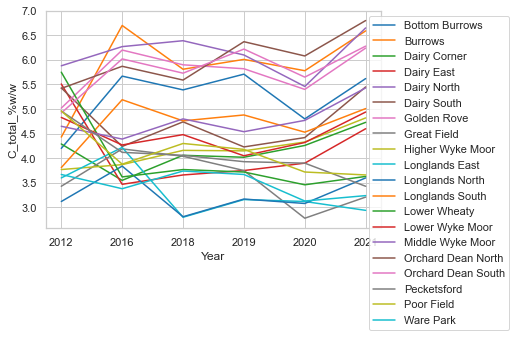

In [452]:
sns.set(style="whitegrid", font_scale=1)
lp = sns.lineplot('Year', 'C_total_%w/w', ci=None, 
             hue='Field', data=group_by_field_year2, palette = "tab10")
lp.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

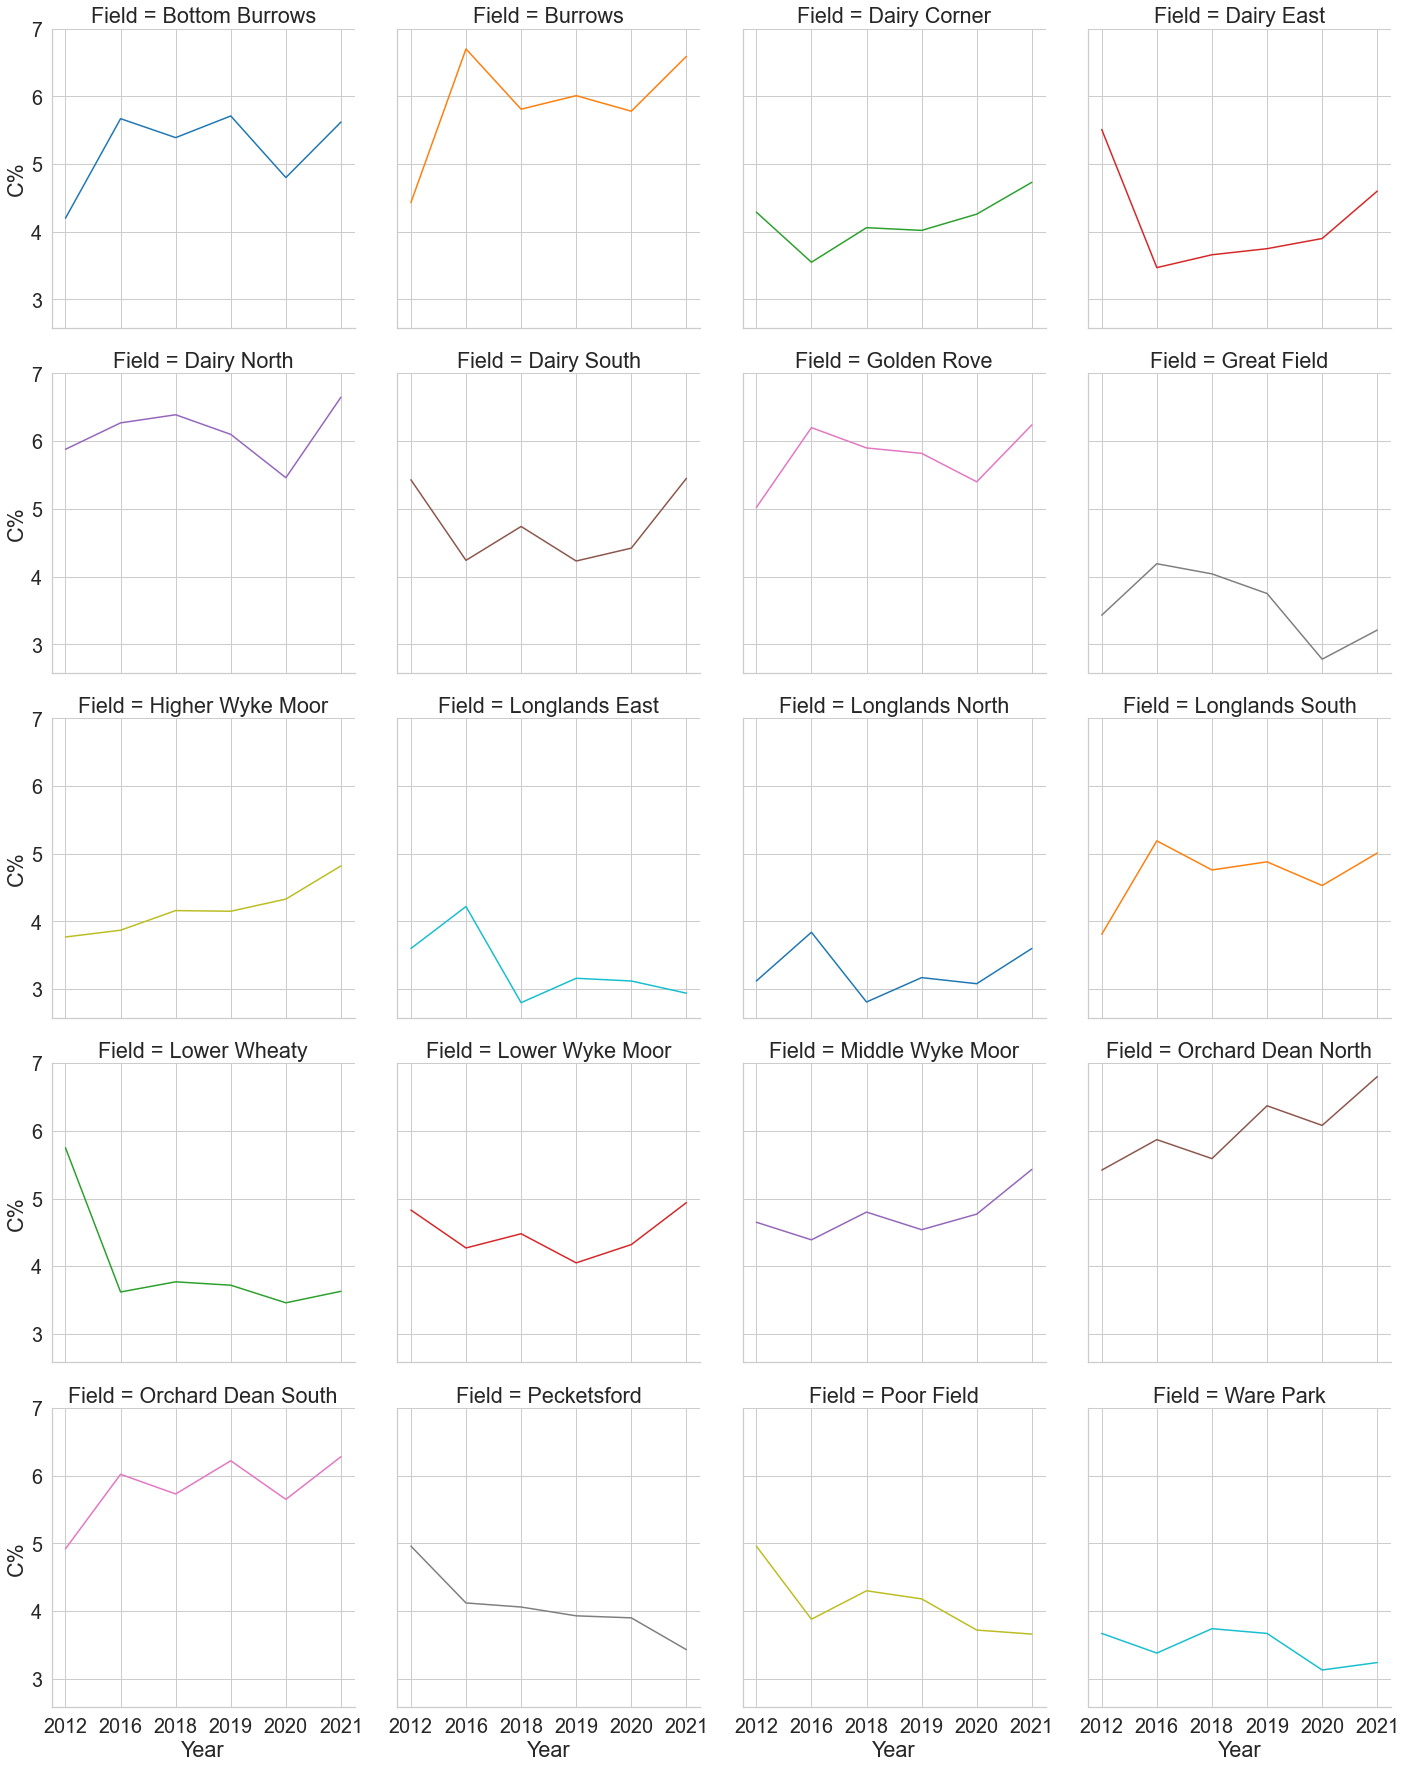

In [453]:
#sns.plotting_context("talk")
#sns.set_theme(style="whitegrid")
sns.set(style="whitegrid", font_scale=1.8)
fig = sns.relplot(data = group_by_field_year2, x = 'Year', y = 'C_total_%w/w', col="Field", kind="line", col_wrap = 4, 
            hue = 'Field', palette = "tab10", legend = False)
fig.set_ylabels("C%", clear_inner=False)
fig.savefig('C%_by_field.png', dpi = 700)

### Join datasets with Landsat spectral bands

In [3]:
## To open files from computer
f2 = glob.glob('files*RS*csv')
f2

['files_2012_with_RS_2012.csv',
 'files_2013-06-01_with_RS_2013-06-04.csv',
 'files_2016-07-01_with_RS_2016-08-15.csv',
 'files_2018_with_RS_2018.csv',
 'files_2019-01-01_with_RS_2019-03-26.csv',
 'files_2019-03-01_with_RS_2019-03-26.csv',
 'files_2019-06-01_with_RS_2019-03-26.csv',
 'files_2019-09-01_with_RS_2019-09-18.csv',
 'files_2020-01-01_with_RS_2020-01-15.csv',
 'files_2020-09-01_with_RS_2020-09-27.csv',
 'files_2020_with_RS_2020.csv',
 'files_2021-03-01_with_RS_2021-02-27.csv',
 'files_2021-06-01_with_RS_2021-07-21.csv',
 'files_2021-08-01_with_RS_2021-07-21.csv',
 'files_2021-09-01_with_RS_2021-09-07.csv',
 'files_2021-12-01_with_RS_2021-09-07.csv']

In [4]:
# Join all the files
f2_df = pd.DataFrame(pd.concat([pd.read_csv(f, sep=';') for f in f2], axis = 0))
f2_df

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Month-year,Year,Sample_time,Easting,Northing,X,Y,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm,B2,B3,B4,B5,B6,B7,NDVI,GNDVI,NDMI,EVI,BSI
0,FP003,1,50.0,Pecketsford,6/6/2012,2012-06,2012,12:00:00,265632.0000,99300.00000,-3.907212,50.777660,5.18,0.916,10.1,0.510,4.742,NaN,8822,9698,9003,22351,14113,10267,0.42572,0.39480,0.22592,1.65165,-0.14841
1,FP003,2,50.0,Pecketsford,6/6/2012,2012-06,2012,12:00:00,265625.0000,99275.00000,-3.907302,50.777434,5.23,0.943,10.4,0.550,4.980,NaN,8555,9519,8860,24651,13799,10119,0.47122,0.44284,0.28224,1.66934,-0.18879
2,FP003,7,50.0,Pecketsford,6/6/2012,2012-06,2012,12:00:00,265575.0000,99225.00000,-3.907992,50.776973,5.54,0.948,11.8,0.640,5.610,NaN,8467,9340,8435,25263,13904,9822,0.49938,0.46016,0.29001,1.88060,-0.20316
3,FP003,9,50.0,Pecketsford,6/6/2012,2012-06,2012,12:00:00,265625.0000,99225.00000,-3.907283,50.776985,5.12,0.857,10.9,0.540,4.510,NaN,8289,9161,8294,27838,13695,9674,0.54091,0.50480,0.34052,1.92101,-0.24327
4,FP003,17,50.0,Pecketsford,6/6/2012,2012-06,2012,12:00:00,265575.0000,99175.00000,-3.907974,50.776524,5.68,0.946,11.5,0.590,5.340,NaN,8290,9341,8294,27537,13695,9524,0.53705,0.49341,0.33571,1.91465,-0.23935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,NW752-3S,2012,NaN,Middle Wyke Moor,9/12/2021,2021-12,2021,12:00:00,266286.9323,97739.51404,-3.906881,50.767098,5.90,NaN,11.0,0.519,5.020,1992.0,8915,10114,10382,19774,16648,12299,0.31145,0.32321,0.08583,0.93162,-0.02977
16,NW752-3S,2010,NaN,Lower Wyke Moor,9/12/2021,2021-12,2021,12:00:00,266451.1332,97788.73835,-3.906172,50.767110,6.10,NaN,10.0,0.423,4.270,2006.0,9156,10348,10967,19271,17204,12830,0.27462,0.30126,0.05667,0.78627,-0.00452
17,NW752-3S,2013,NaN,Dairy South,9/12/2021,2021-12,2021,12:00:00,266152.0651,97968.50154,-3.905464,50.767122,6.10,NaN,10.6,0.499,4.710,1992.0,9060,10166,10585,19504,16460,12257,0.29642,0.31473,0.08464,0.88962,-0.02732
18,NW752-3S,2016,NaN,Dairy East,9/12/2021,2021-12,2021,12:00:00,266335.1610,98244.47438,-3.904755,50.767133,6.00,NaN,9.6,0.445,4.210,1988.0,9145,10285,10809,18750,17287,12919,0.26865,0.29154,0.04060,0.79358,0.00359


In [233]:
f2_df.to_csv("final_dataRR_with_RS.csv", index = False)

#### Different groupings

In [222]:
## Group by year and field, all columns, check corr and save
group_by_field_year3 = f2_df.groupby(['Year','Field']).mean().reset_index()
group_by_field_year3.to_csv('group_year_field.csv', index = False)
group_by_field_year3.drop(['Year', 'Field', 'SP_ID', 'sample_distance (m)', 'Easting', 'Northing', 
                           'X', 'Y', 'pH', 'BD_gcm3', 'OM_%w/w', 'N_total_%w/w', 'conductivity_uScm'], axis = 1).corr()

,C_total_%w/w,B2,B3,B4,B5,B6,B7,NDVI,GNDVI,NDMI,EVI,BSI
C_total_%w/w,1.000000,0.173589,0.106386,0.125752,-0.060776,0.148712,0.134453,-0.091345,-0.085497,-0.106708,-0.081742,0.103985
B2,0.173589,1.000000,0.823709,0.865567,-0.339671,0.718160,0.653709,-0.572219,-0.534773,-0.557794,-0.596427,0.579799
B3,0.106386,0.823709,1.000000,0.793595,-0.092792,0.540788,0.471310,-0.356168,-0.335780,-0.308779,-0.485806,0.354820
B4,0.125752,0.865567,0.793595,1.000000,-0.601891,0.848212,0.866448,-0.815967,-0.778120,-0.785527,-0.888010,0.815992
B5,-0.060776,-0.339671,-0.092792,-0.601891,1.000000,-0.609654,-0.774503,0.947897,0.964191,0.920021,0.868615,-0.920564
B6,0.148712,0.718160,0.540788,0.848212,-0.609654,1.000000,0.961668,-0.770895,-0.724803,-0.868583,-0.820603,0.865884
B7,0.134453,0.653709,0.471310,0.866448,-0.774503,0.961668,1.000000,-0.894840,-0.860646,-0.952120,-0.924403,0.953823
NDVI,-0.091345,-0.572219,-0.356168,-0.815967,0.947897,-0.770895,-0.894840,1.000000,0.994010,0.969339,0.970762,-0.979356
GNDVI,-0.085497,-0.534773,-0.335780,-0.778120,0.964191,-0.724803,-0.860646,0.994010,1.000000,0.955388,0.953847,-0.965910
NDMI,-0.106708,-0.557794,-0.308779,-0.785527,0.920021,-0.868583,-0.952120,0.969339,0.955388,1.000000,0.943019,-0.997604


In [ ]:
## Group by year and field, all columns, check corr and save
group_by_field_year3 = f2_df.groupby(['Year','Field']).mean().reset_index()
group_by_field_year3.to_csv('group_year_field.csv', index = False)
group_by_field_year.drop(['Year', 'Field', 'SP_ID', 'sample_distance (m)', 'Easting', 'Northing', 
                           'X', 'Y', 'pH', 'BD_gcm3', 'OM_%w/w', 'N_total_%w/w', 'conductivity_uScm'], axis = 1).corr()

In [232]:
group_by_field_year3.drop(['Year', 'Field', 'SP_ID', 'sample_distance (m)', 'Easting', 'Northing', 
                           'X', 'Y', 'pH', 'BD_gcm3', 'OM_%w/w', 'N_total_%w/w', 'conductivity_uScm'], axis = 1).corr()

,C_total_%w/w,B2,B3,B4,B5,B6,B7,NDVI,GNDVI,NDMI,EVI,BSI
C_total_%w/w,1.000000,0.173589,0.106386,0.125752,-0.060776,0.148712,0.134453,-0.091345,-0.085497,-0.106708,-0.081742,0.103985
B2,0.173589,1.000000,0.823709,0.865567,-0.339671,0.718160,0.653709,-0.572219,-0.534773,-0.557794,-0.596427,0.579799
B3,0.106386,0.823709,1.000000,0.793595,-0.092792,0.540788,0.471310,-0.356168,-0.335780,-0.308779,-0.485806,0.354820
B4,0.125752,0.865567,0.793595,1.000000,-0.601891,0.848212,0.866448,-0.815967,-0.778120,-0.785527,-0.888010,0.815992
B5,-0.060776,-0.339671,-0.092792,-0.601891,1.000000,-0.609654,-0.774503,0.947897,0.964191,0.920021,0.868615,-0.920564
B6,0.148712,0.718160,0.540788,0.848212,-0.609654,1.000000,0.961668,-0.770895,-0.724803,-0.868583,-0.820603,0.865884
B7,0.134453,0.653709,0.471310,0.866448,-0.774503,0.961668,1.000000,-0.894840,-0.860646,-0.952120,-0.924403,0.953823
NDVI,-0.091345,-0.572219,-0.356168,-0.815967,0.947897,-0.770895,-0.894840,1.000000,0.994010,0.969339,0.970762,-0.979356
GNDVI,-0.085497,-0.534773,-0.335780,-0.778120,0.964191,-0.724803,-0.860646,0.994010,1.000000,0.955388,0.953847,-0.965910
NDMI,-0.106708,-0.557794,-0.308779,-0.785527,0.920021,-0.868583,-0.952120,0.969339,0.955388,1.000000,0.943019,-0.997604


### Join datasets with Sentinel-2 spectral bands

In [66]:
## To open files from computer
f3 = glob.glob('files*RS*S2A*csv')
f3

['files_2016-07-01_with_RS_2016-07-19_S2A.csv',
 'files_2018-04-01_with_RS_2018-04-20_S2A.csv',
 'files_2018-05-01_with_RS_2018-05-05_S2A.csv',
 'files_2018-07-01_with_RS_2018-07-19_S2A.csv',
 'files_2018-08-01_with_RS_2018-09-27_S2A.csv',
 'files_2018-10-01_with_RS_2018-09-27_S2A.csv',
 'files_2019-03-01_with_RS_2019-03_26-S2A.csv',
 'files_2019-06-01_with_RS_2019-07-04_S2A.csv',
 'files_2019-09-01_with_RS_2019-08-23_S2A.csv',
 'files_2020-01-01_with_RS_2020-01-15_S2A.csv',
 'files_2020-06-01_with_RS_2020-06-23_S2A.csv',
 'files_2020-08-01_with_RS_2020-08-12_S2A.csv',
 'files_2020-09-01_with_RS_2020-09-21_S2A.csv',
 'files_2020-12-01_with_RS_2020-12-20_S2A.csv',
 'files_2021-03-01_with_RS_2021-03-30_S2A.csv',
 'files_2021-06-01_with_RS_2021-06-13_S2A.csv',
 'files_2021-08-01_with_RS_2021-07-18_S2A.csv',
 'files_2021-09-01_with_RS_2021-07-18_S2A.csv',
 'files_2021-12-01_with_RS_2021-12-05_S2A.csv']

In [91]:
# Clean and save all the files 
f0 = pd.read_csv( 'files_2020-12-01_with_RS_2020-12-20_S2A.csv', sep = ',')
f0.rename(columns = {'sample_dis': 'sample_distance (m)', 'Sample_dat': 'Sample_Date', 'Sample_tim': 'Sample_time', 
                     'conductivi':'conductivity_uScm', 'C_total_%w':'C_total_%w/w', 'N_total_%w': 'N_total_%w/w', '7': 'B7'}, inplace  =True)
f0.to_csv( 'files_2020-12-01_with_RS_2020-12-20_S2A.csv', index = False)

In [92]:
# Join all csv
f3_df = pd.DataFrame(pd.concat([pd.read_csv(f, sep = ',') for f in f3], axis = 0))
f3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 0 to 19
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment           632 non-null    object 
 1   SP_ID                632 non-null    int64  
 2   sample_distance (m)  347 non-null    float64
 3   Field                632 non-null    object 
 4   Sample_Date          632 non-null    object 
 5   Month-year           632 non-null    object 
 6   Year                 632 non-null    int64  
 7   Sample_time          632 non-null    object 
 8   Easting              632 non-null    float64
 9   Northing             632 non-null    float64
 10  X                    632 non-null    float64
 11  Y                    632 non-null    float64
 12  pH                   631 non-null    float64
 13  BD_gcm3              343 non-null    float64
 14  OM_%w/w              632 non-null    float64
 15  N_total_%w/w         632 non-null    floa

In [100]:
# Convert to integer, round to 2 decimals and save file
cols = ['B2', 'B3','B4', 'B5','B6', 'B7','B8','B8A','B11', 'B12']
f3_df[cols] = f3_df[cols].astype(int)
cols2 = ['NDVI','GNDVI','NDRE', 'NDMI', 'EVI', 'BSI']
f3_df[cols2] = f3_df[cols2].round(2)
f3_df.to_csv('all_data_Sentinel.csv', index = False)
f3_df.head()

,Experiment,SP_ID,sample_distance (m),Field,Sample_Date,Month-year,Year,Sample_time,Easting,Northing,X,Y,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,NDVI,GNDVI,NDRE,NDMI,EVI,BSI
0,FP059,257,50.0,Ware Park,1/7/2016,2016-07,2016,14:10:00,265825.0,98675.0,-3.907212,50.777660,5.92,1.09,6.59,0.368,3.116,NaN,944,865,645,1148,3141,4159,3782,4765,1964,881,0.76,0.69,0.21,0.42,0.89,-0.37
1,FP059,269,50.0,Ware Park,1/7/2016,2016-07,2016,11:35:00,265725.0,98625.0,-3.907302,50.777434,5.86,0.66,7.26,0.391,3.491,NaN,898,956,586,1238,3038,3869,3704,4311,1996,839,0.76,0.64,0.17,0.37,0.84,-0.34
2,FP059,271,50.0,Ware Park,1/7/2016,2016-07,2016,14:25:00,265775.0,98625.0,-3.907992,50.776973,5.46,1.01,8.26,0.456,3.957,NaN,883,817,513,1120,3315,4409,4391,5041,1969,835,0.82,0.72,0.21,0.44,0.98,-0.41
3,FP059,273,50.0,Ware Park,1/7/2016,2016-07,2016,11:55:00,265825.0,98625.0,-3.907283,50.776985,5.59,1.07,6.62,0.355,3.149,NaN,922,965,585,1245,3105,3913,3885,4482,1962,800,0.77,0.65,0.18,0.39,0.88,-0.36
4,FP059,280,50.0,Ware Park,1/7/2016,2016-07,2016,11:20:00,265775.0,98575.0,-3.907974,50.776524,5.92,1.04,6.32,0.343,3.038,NaN,917,978,585,1265,3178,3965,3886,4513,1989,825,0.77,0.64,0.17,0.39,0.88,-0.36


### Separate files by year

Interesting fact was that the correlation of C% with the spectral bands was far more better by year rather than considering all the years together. That's why I am separating the files by year to build separate models for each year.

In [110]:
# Sentinel
file_2016 = f3_df.loc[f3_df['Year'] == 2016]
file_2016.to_csv("data2016_sentinel.csv", index = False)
file_2018 = f3_df.loc[f3_df['Year'] == 2018]
file_2018.to_csv("data2018_sentinel.csv", index = False)
file_2019 = f3_df.loc[f3_df['Year'] == 2019]
file_2019.to_csv("data2019_sentinel.csv", index = False)
file_2020 = f3_df.loc[f3_df['Year'] == 2020]
file_2020.to_csv("data2020_sentinel.csv", index = False)
file_2021 = f3_df.loc[f3_df['Year'] == 2021]
file_2021.to_csv("data2021_sentinel.csv", index = False)

In [188]:
# Landsat
f4_df = pd.read_csv("all_data_landsat.csv", sep = ';')
f4_df['Year'].unique()

array([2012, 2013, 2016, 2018, 2019, 2020, 2021], dtype=int64)

In [190]:
# Separate file by years and export
land_2012 = f4_df.loc[f4_df['Year'] == 2012]
land_2012.to_csv("data2016_landsat.csv", index = False)
land_2013 = f4_df.loc[f4_df['Year'] == 2013]
land_2013.to_csv("data2016_landsat.csv", index = False)
land_2016 = f4_df.loc[f4_df['Year'] == 2016]
land_2016.to_csv("data2016_landsat.csv", index = False)
land_2018 = f4_df.loc[f4_df['Year'] == 2018]
land_2018.to_csv("data2018_landsat.csv", index = False)
land_2019 = f4_df.loc[f4_df['Year'] == 2019]
land_2019.to_csv("data2019_landsat.csv", index = False)
land_2020 = f4_df.loc[f4_df['Year'] == 2020]
land_2020.to_csv("data2020_landsat.csv", index = False)
land_2021 = f4_df.loc[f4_df['Year'] == 2021]
land_2021.to_csv("data2021_landsat.csv", index = False)